-------------
Assignment
-------------

1) Use various clustering methods on the data from the [mall customers datasets](https://www.kaggle.com/datasets/shwetabh123/mall-customers).
Find interesting correlations and try to explain the reasons with appropiate interpretations. Try to find at least some correlations that seem counterintuitive at first. Use dimentionality reduction techniques for better clustering and visualization.

2) Bonus task - Same requirements for the credit card data from the [credit card dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata). This is a harder dataset, so you might need to dig deeper for insights.


# Load and explore the dataset

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd


Load the dataset.

In [2]:
# Load CSV file
df = pd.read_csv("Mall_Customers.csv")

df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## Check the numeric and categorical columns

Check the data types.

In [3]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Display the numeric columns.

In [4]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


- The numeric columns of this dataset are: 'CustomerID', 'Age', 'Annual Income' and 'Spending Score'

Display the categorical columns.

In [5]:
print(df.describe(include='object'))

         Genre
count      200
unique       2
top     Female
freq       112


- The only categorical column of this dataset is 'Genre'

## Check for missing values

In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


- We see that there are no missing values in this dataset

## Feature analysis

### Visualize the feature distribution

Distribution of 'Age' column.

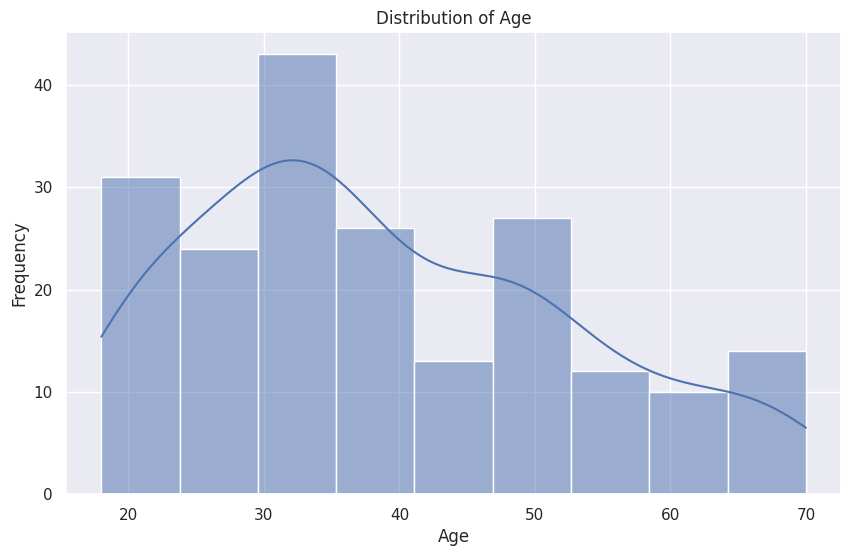

In [7]:
col = 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

- We observe that most of the mall's customers are between 30 - 35 years old, followed by young people (15 - 25 years old) and middle aged people (45 - 55 years old).

Distribution of 'Annual Income (k$)' column.

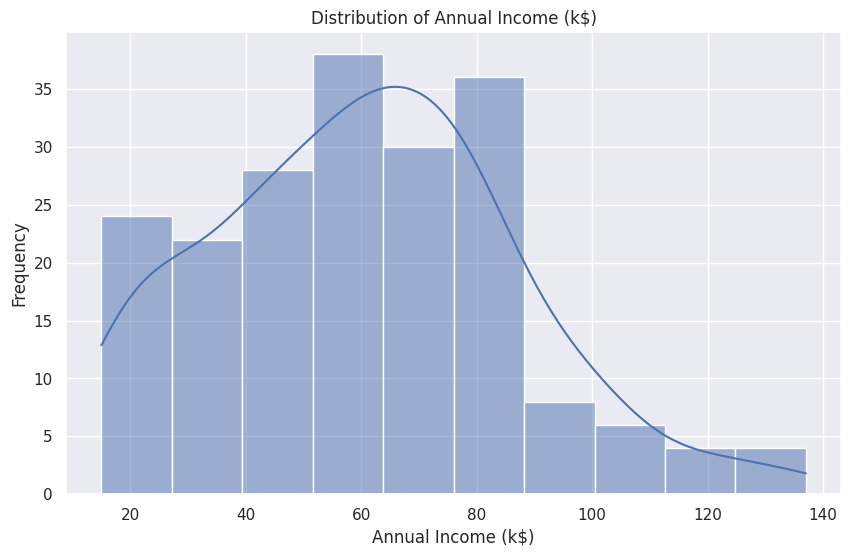

In [8]:
col = 'Annual Income (k$)'
plt.figure(figsize=(10, 6))
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

- We see that most of the mall's customers have an average annual income (around 60 - 80 k), followed by a low annual income (20 - 50 k).

Distribution of 'Spending Score (1-100)' column.

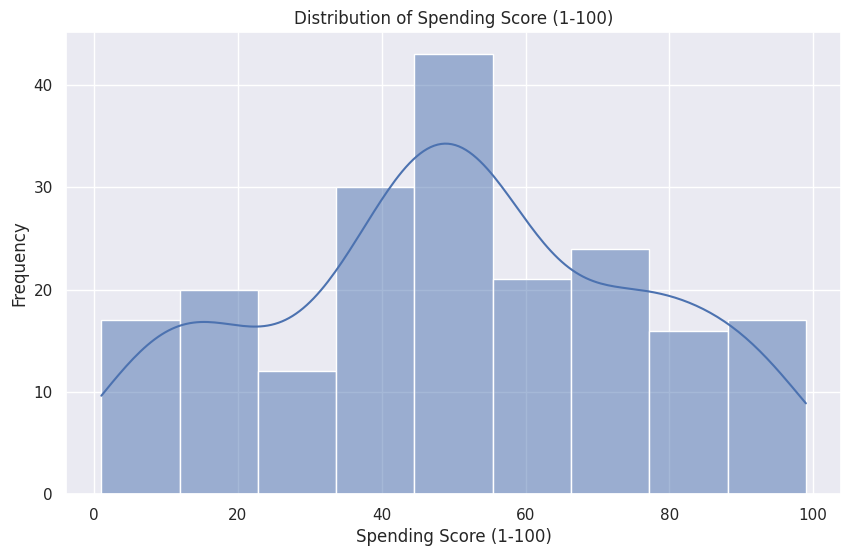

In [9]:
col = 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
sns.histplot(df[col], kde=True)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

- We see from the plot that the spending score peaks in the middle (around 50), not too big, not too small, but there is a alight tendency for a bigger spending score rather than a small one.

Distribution of 'Genre' column.

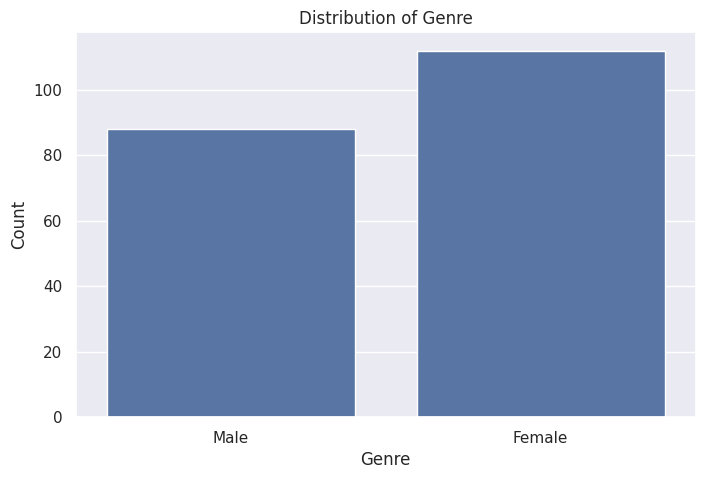

In [10]:
col = 'Genre'
plt.figure(figsize=(8, 5))
sns.countplot(x=col, data=df)
plt.title(f'Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

- We can clearly conclude that most of the more clients are female, but there is not a big unbalance between the number of males (around 90) and females (around 110).

### Check for outliers

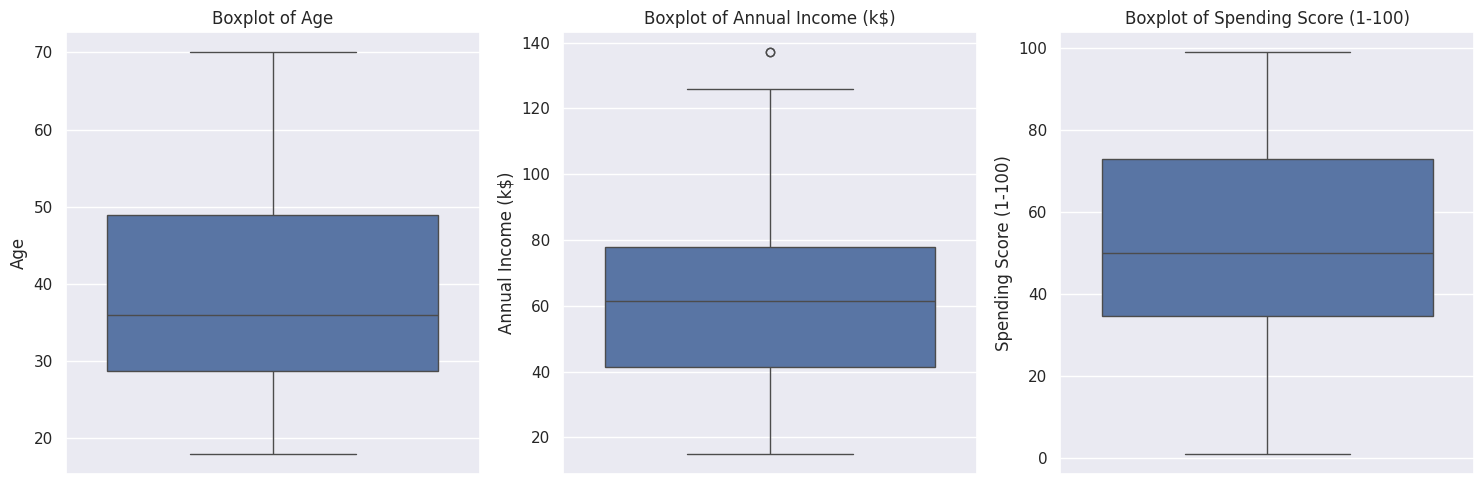

In [11]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- We see that there are no outliers , except for a big value for annual income, meaning that there are some customers with a big income, so we will leave the values as they are.

### Visualize relations between features

Visualise the correlation matrix between numeric features.

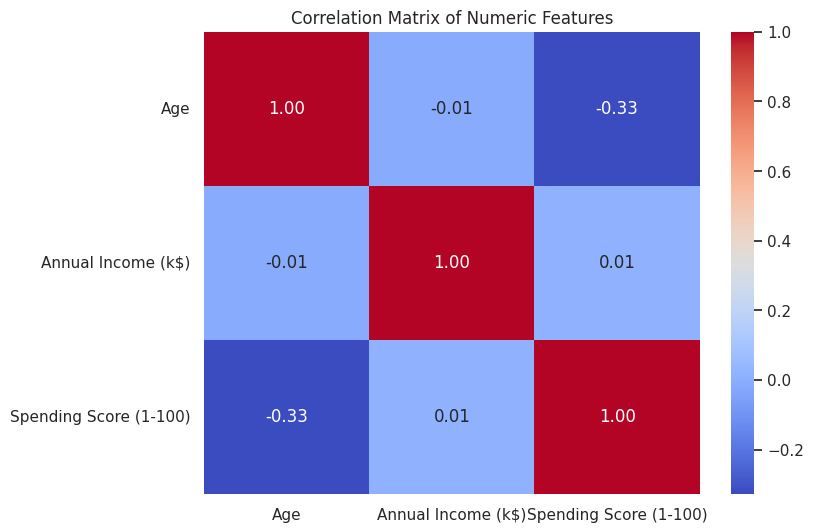

In [12]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- We see from the heatmap that the most correlated features are 'Age' and 'Spending Score'

Create a scatter plot to see how 'Age' and 'Spending Score' features are related.

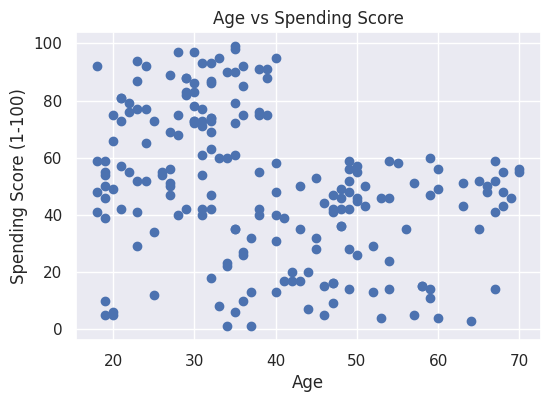

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

- We see that as the age increases the spending score is smaller (over 40 years old).
- The customers with the biggest spending scores are under 40 years old.

Create a scatter plot to see how 'Annual Income' and 'Spending Score' features are related.

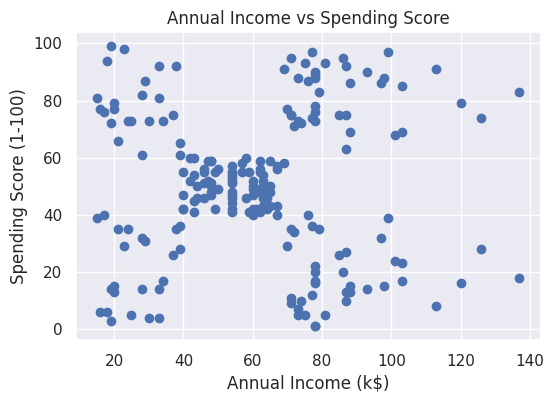

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

- We see from the scatter plot that there is no clear relation between the annual income and the spending score of a client costumer.
- Most of the costumers have a medium-low annual income and an average spending score.
- There are costumers with low income and high spending score and also clients with a higher income and lower spending score.

Create a scatter plot to see how the features 'Annual Income' and 'Age' are related.

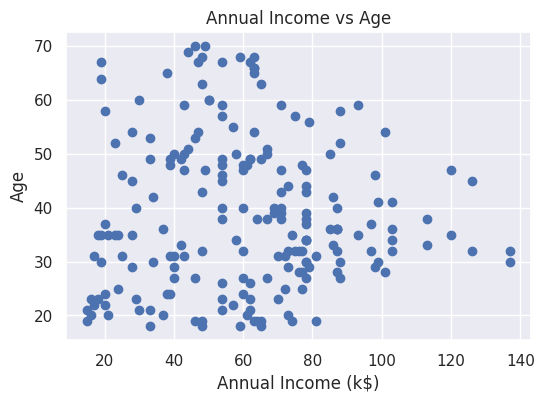

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df['Annual Income (k$)'], df['Age'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.title("Annual Income vs Age")
plt.show()

- We see that younder people (under 30 years) have a lower annual income
- The costumers with the bigger annual income are between 30 and 50 years
- Elderly costumers have a lower annual income, as they probably are retired

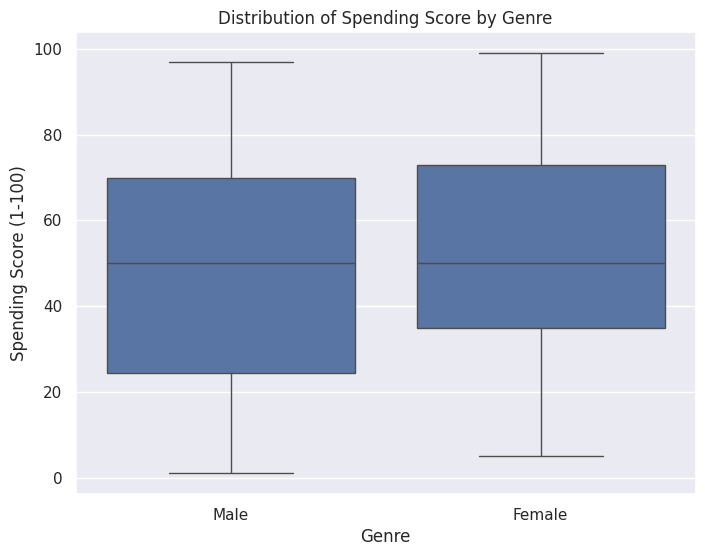

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Distribution of Spending Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')
plt.show()

- We observe from this plot that the median spending score for females is slightly higher than for males, and the distribution for females appears to be wider.

# Data Preprocessing

## Encode the categorical column 'Genre'

We will encode the categorical column 'Genre' using One-Hot Encoding.

In [17]:
df_encoded = pd.get_dummies(df, columns=['Genre'], drop_first=True)
df_encoded['Genre_Male'] = df_encoded['Genre_Male'].astype(int)
display(df_encoded.head())

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0           1   19                  15                      39           1
1           2   21                  15                      81           1
2           3   20                  16                       6           0
3           4   23                  16                      77           0
4           5   31                  17                      40           0

## Drop redundant columns

Drop the column 'CustomerID' because we will not use it in any algorithms.

In [18]:
df_encoded = df_encoded.drop('CustomerID', axis=1)
display(df_encoded.head())

Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0   19                  15                      39           1
1   21                  15                      81           1
2   20                  16                       6           0
3   23                  16                      77           0
4   31                  17                      40           0

## Scale the numeric features

We will scale the numeric features Age', 'Annual Income (k$)' and 'Spending Score (1-100)' using *StandardScaler*.

!!! Use normalization

In [19]:
from sklearn.preprocessing import StandardScaler

# Define the numeric columns to scale
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

display(df_encoded.head())

Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0 -1.424569           -1.738999               -0.434801           1
1 -1.281035           -1.738999                1.195704           1
2 -1.352802           -1.700830               -1.715913           0
3 -1.137502           -1.700830                1.040418           0
4 -0.563369           -1.662660               -0.395980           0

# Clustering methods

---------------------------------
## 1️⃣ K-Means Clustering
---------------------------------

### Annual Income vs Spending Score (Elbow Method)

In [20]:
from sklearn.cluster import KMeans

# Select the features for clustering
X = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

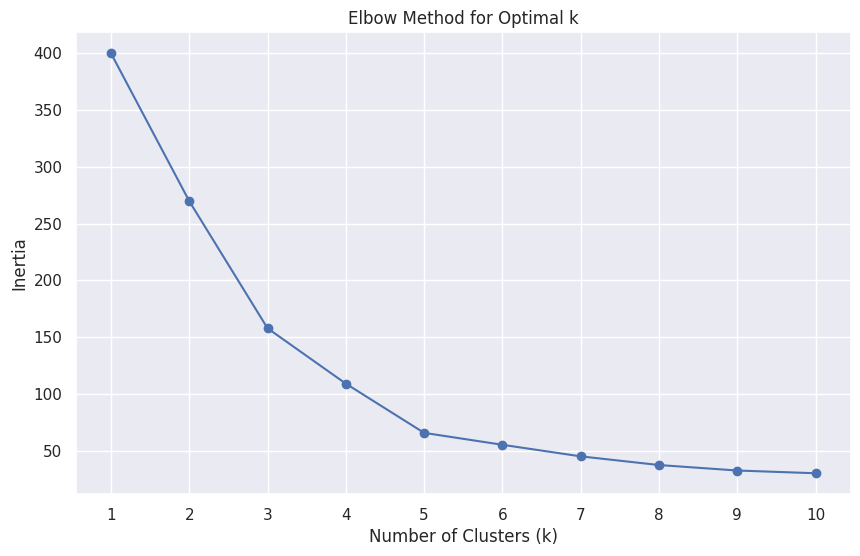

In [21]:
# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

- We see k = 5 is the best value, based on the Elbow Method

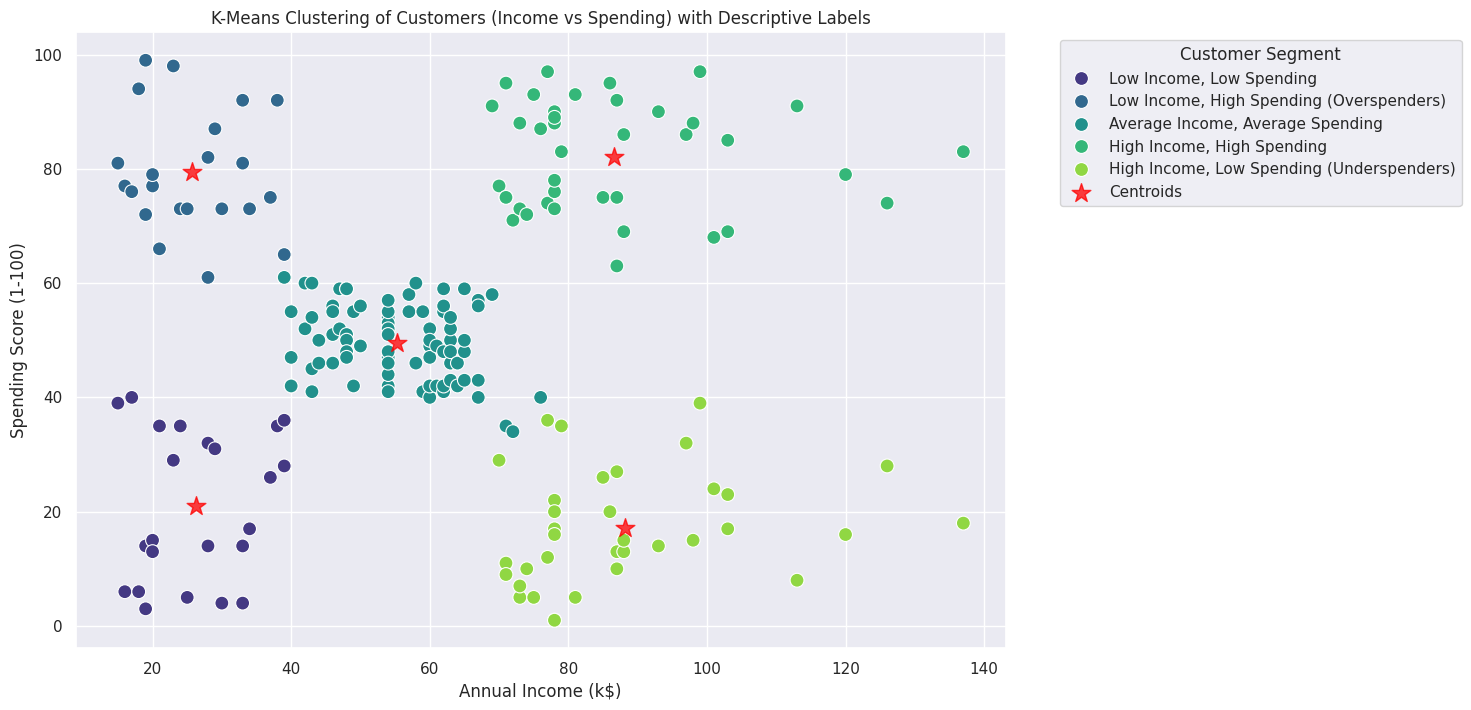

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the features for clustering (using the scaled data from df_encoded)
X = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# We will choose k=5
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Get the centroids of the clusters (these are on the scaled data)
centroids_scaled = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale
# Need to re-initialize and fit a scaler on the original data used for clustering
original_data_for_scaling = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler_for_inverse = StandardScaler()
scaler_for_inverse.fit(original_data_for_scaling) # Fit scaler on original data

centroids_original_scale = scaler_for_inverse.inverse_transform(centroids_scaled)


# Add the numerical cluster labels to the original dataframe
df['Income_Spending_Cluster_ID'] = clusters

# Analyze cluster characteristics to create descriptive labels
cluster_characteristics = df.groupby('Income_Spending_Cluster_ID')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


# Based on the characteristics, define descriptive labels for each cluster ID by interpreting the mean values printed above.
cluster_labels_map = {
    0: 'Average Income, Average Spending',
    1: 'High Income, High Spending',
    2: 'Low Income, High Spending (Overspenders)',
    3: 'High Income, Low Spending (Underspenders)',
    4: 'Low Income, Low Spending'
}

# Map the numerical cluster IDs to descriptive labels
df['Income_Spending_Cluster_Label'] = df['Income_Spending_Cluster_ID'].map(cluster_labels_map)


# Visualize the clusters and centroids on the original data scales with descriptive labels
plt.figure(figsize=(12, 8)) # Increased figure size for better legend readability
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income_Spending_Cluster_Label', data=df, palette='viridis', s=100)
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], c='red', s=200, alpha=0.75, marker='*', label='Centroids')
plt.title('K-Means Clustering of Customers (Income vs Spending) with Descriptive Labels')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.grid(True)
plt.show()

In [23]:
# Display the characteristics of each cluster
print("\nCluster Characteristics (Income vs Spending):")
print(df.groupby('Income_Spending_Cluster_ID')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Characteristics (Income vs Spending):
                            Annual Income (k$)  Spending Score (1-100)
Income_Spending_Cluster_ID                                            
0                                    55.296296               49.518519
1                                    86.538462               82.128205
2                                    25.727273               79.363636
3                                    88.200000               17.114286
4                                    26.304348               20.913043


We can observe from the plot that:

- 💜 The purple cluster belongs to moderate people, those who have a medium income (55.29k) and a spending score in the middle (49.51)
- 💙 The dark blue cluster belongs to people who earn much (86.53) and also spend much (82.12)
- 🩵 The turqoise cluster indicates overspenders, customers who have a low annual income (25.72), but a high spending score (79.36)
- 💚 The green cluster shows underspenders, customers who have a big annual income (88.20), but who have a very low spending score, below average (17.11)
- 💛 The yellow cluster indicates the people who have a low income (26.30) and a low spending score (20.91)


### Annual Income vs Age (Elbow Method)

In [24]:
from sklearn.cluster import KMeans

# Select the features for clustering
X = df_encoded[['Annual Income (k$)', 'Age']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

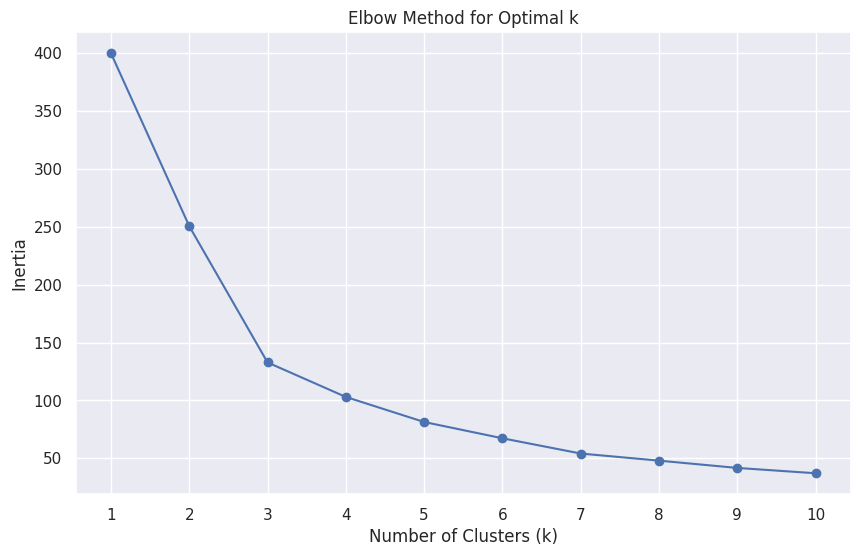

In [25]:
# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

- We see k = 3 is the best value, based on the Elbow Method

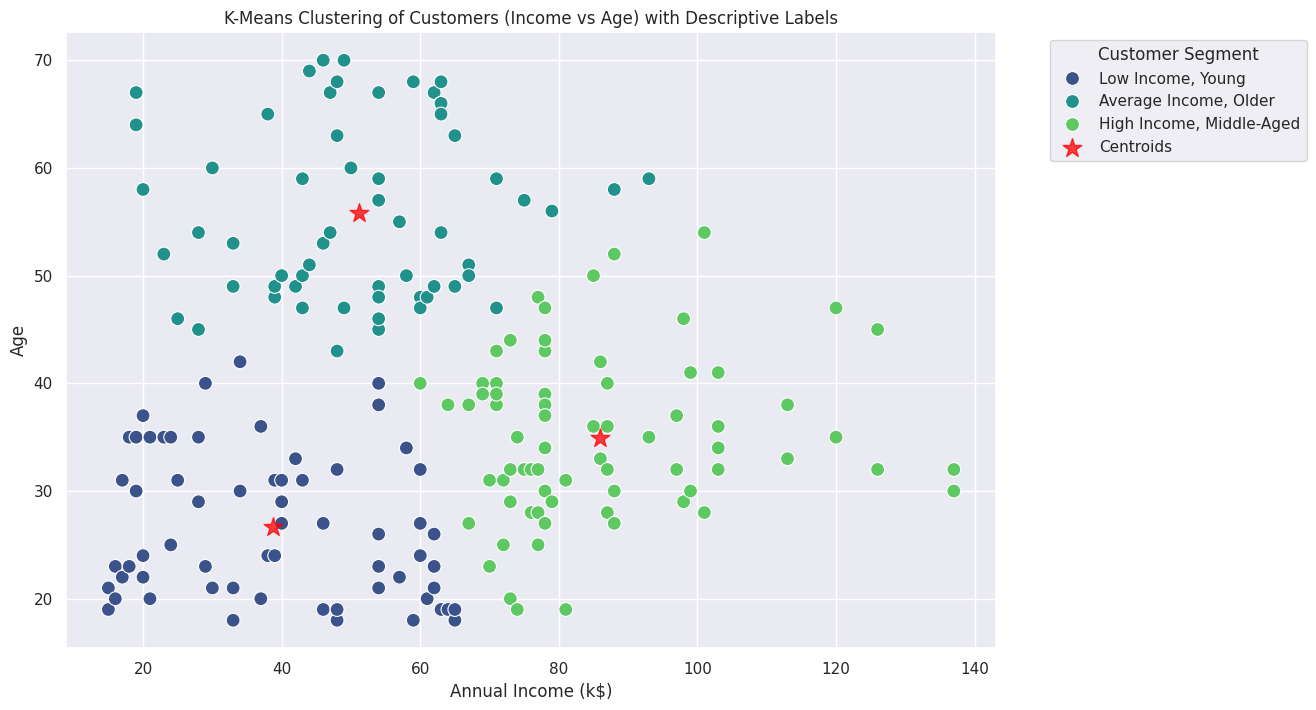

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the features for clustering (using the scaled data from df_encoded)
X = df_encoded[['Annual Income (k$)', 'Age']]

# We will choose k=3 based on the elbow method
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Get the centroids of the clusters (these are on the scaled data)
centroids_scaled = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale
# Need to re-initialize and fit a scaler on the original data used for clustering
original_data_for_scaling = df[['Annual Income (k$)', 'Age']]
scaler_for_inverse = StandardScaler()
scaler_for_inverse.fit(original_data_for_scaling) # Fit scaler on original data

centroids_original_scale = scaler_for_inverse.inverse_transform(centroids_scaled)


# Add the numerical cluster labels to the original dataframe
df['Income_Age_Cluster_ID'] = clusters

# Analyze cluster characteristics to create descriptive labels
cluster_characteristics = df.groupby('Income_Age_Cluster_ID')[['Annual Income (k$)', 'Age']].mean()

# Based on the characteristics, define descriptive labels for each cluster ID
# This step requires interpreting the mean values printed above.
# Example labels based on typical findings for this dataset with k=3:
# You might need to adjust these based on the actual output of cluster_characteristics
cluster_labels_map = {
    0: 'High Income, Middle-Aged',
    1: 'Low Income, Young',
    2: 'Average Income, Older'
}

# Map the numerical cluster IDs to descriptive labels
df['Income_Age_Cluster_Label'] = df['Income_Age_Cluster_ID'].map(cluster_labels_map)

# Visualize the clusters and centroids on the original data scales with descriptive labels
plt.figure(figsize=(12, 8)) # Increased figure size for better legend readability
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='Income_Age_Cluster_Label', data=df, palette='viridis', s=100)
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], c='red', s=200, alpha=0.75, marker='*', label='Centroids')
plt.title('K-Means Clustering of Customers (Income vs Age) with Descriptive Labels')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.grid(True)
plt.show()

# Note: The numerical cluster ID column 'Income_Age_Cluster_ID' is also in df

In [27]:
# Display the characteristics of each cluster
print("\nCluster Characteristics (Income vs Age):")
print(df.groupby('Income_Age_Cluster_ID')[['Annual Income (k$)', 'Age']].mean())


Cluster Characteristics (Income vs Age):
                       Annual Income (k$)        Age
Income_Age_Cluster_ID                               
0                               85.934211  34.960526
1                               38.790323  26.661290
2                               51.225806  55.806452


We observe from the plot that:
- 💜 The purple cluster belongs to customer of all ages, but not too old (around 34 y.o.), whose annual income is greater than average (85.93).
- 🩵 The turqoise cluster indicates younger customers (around 26 y.o.), who have a small annual income (38.79)
- 💛 The yellow cluster indicates the older customers (around 55 y.o.) who have an average-low annual income (51.22)

### Age vs Spending Score (Silhouette Method)

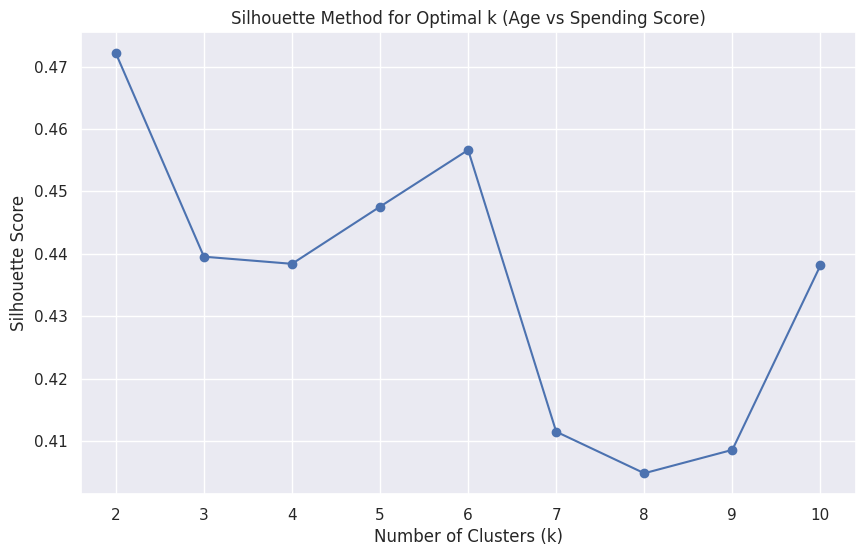


Optimal number of clusters based on Silhouette Method: 2


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select the features for clustering
X_age_spending = df_encoded[['Age', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores = []
for n_clusters in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_age_spending)
    score = silhouette_score(X_age_spending, clusters)
    silhouette_scores.append(score)

# Plot the silhouette method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k (Age vs Spending Score)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the number of clusters with the highest silhouette score
optimal_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Method: {optimal_k_silhouette}")

- We see that the best k is 2, based on the fact that k=2 has the biggest sihlouette score

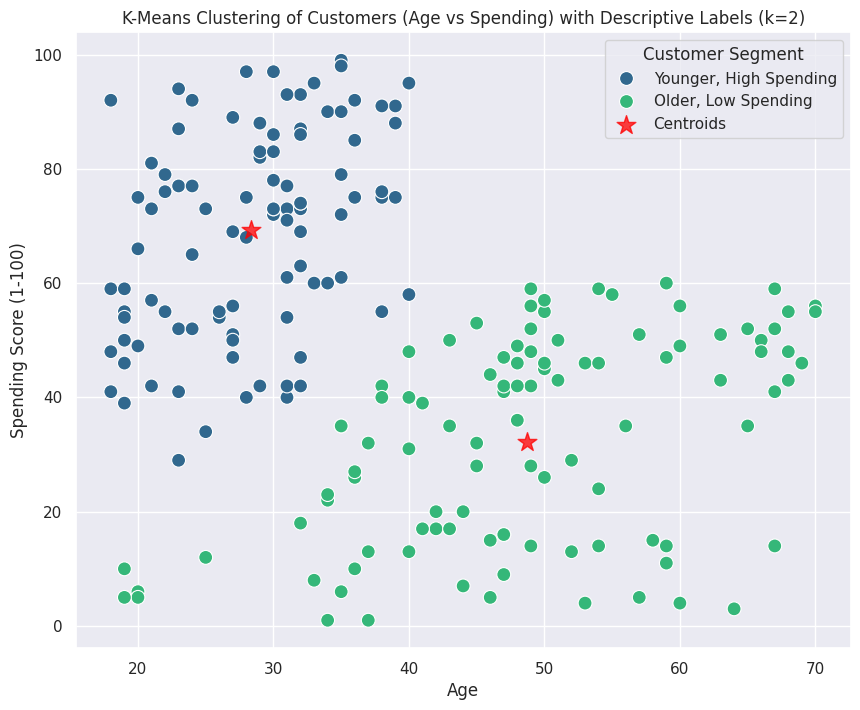

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the features for clustering (using the scaled data from df_encoded)
X_age_spending = df_encoded[['Age', 'Spending Score (1-100)']]

# Perform K-Means clustering with k=2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters_age_spending = kmeans.fit_predict(X_age_spending)

# Get the centroids of the clusters (these are on the scaled data)
centroids_scaled_age_spending = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale
# Need to re-initialize and fit a scaler on the original data used for clustering
original_data_for_scaling_age_spending = df[['Age', 'Spending Score (1-100)']]
scaler_for_inverse_age_spending = StandardScaler()
scaler_for_inverse_age_spending.fit(original_data_for_scaling_age_spending) # Fit scaler on original data

centroids_original_scale_age_spending = scaler_for_inverse_age_spending.inverse_transform(centroids_scaled_age_spending)


# Add the numerical cluster labels to the original dataframe
df['Age_Spending_Cluster_ID'] = clusters_age_spending

# Analyze cluster characteristics to create descriptive labels
cluster_characteristics_age_spending = df.groupby('Age_Spending_Cluster_ID')[['Age', 'Spending Score (1-100)']].mean()

# Based on the characteristics, define descriptive labels for each cluster ID
cluster_labels_map_age_spending = {
    0: 'Older, Low Spending',
    1: 'Younger, High Spending'
}

# Map the numerical cluster IDs to descriptive labels
df['Age_Spending_Cluster_Label'] = df['Age_Spending_Cluster_ID'].map(cluster_labels_map_age_spending)


# Visualize the clusters and centroids on the original data scales with descriptive labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Age_Spending_Cluster_Label', data=df, palette='viridis', s=100)
plt.scatter(centroids_original_scale_age_spending[:, 0], centroids_original_scale_age_spending[:, 1], c='red', s=200, alpha=0.75, marker='*', label='Centroids')
plt.title('K-Means Clustering of Customers (Age vs Spending) with Descriptive Labels (k=2)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

In [30]:
# Display the characteristics of each cluster using the original data
print("\nCluster Characteristics (Age vs Spending):")
print(df.groupby('Age_Spending_Cluster_ID')[['Age', 'Spending Score (1-100)']].mean())


Cluster Characteristics (Age vs Spending):
                               Age  Spending Score (1-100)
Age_Spending_Cluster_ID                                   
0                        48.728155               32.184466
1                        28.360825               69.329897


We can observe from the plot that:
- 🩵 The blue cluster indicates mostly middle aged - older customers, who have a low average spending score (average below 60)
- 💚 The green cluster shows younger customers, who have a big spending score (average above 60)


### Age vs Spending Score (Elbow Method)

In [31]:
from sklearn.cluster import KMeans

# Select the features for clustering
X = df_encoded[['Age', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

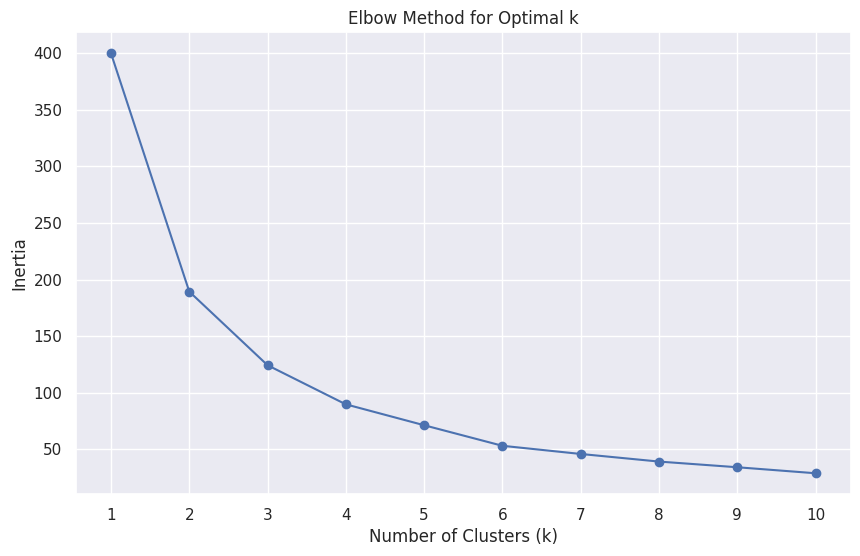

In [32]:
# Plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

- We see k = 2 is the best value, based on the Elbow Method

**Conclusion:** The Elbow method and the Silhouette method gave the same result for best k, which is K = 2.

### Comparison between TSNE and PCA

Plot the data dimensionally reduced by tsne and pca.

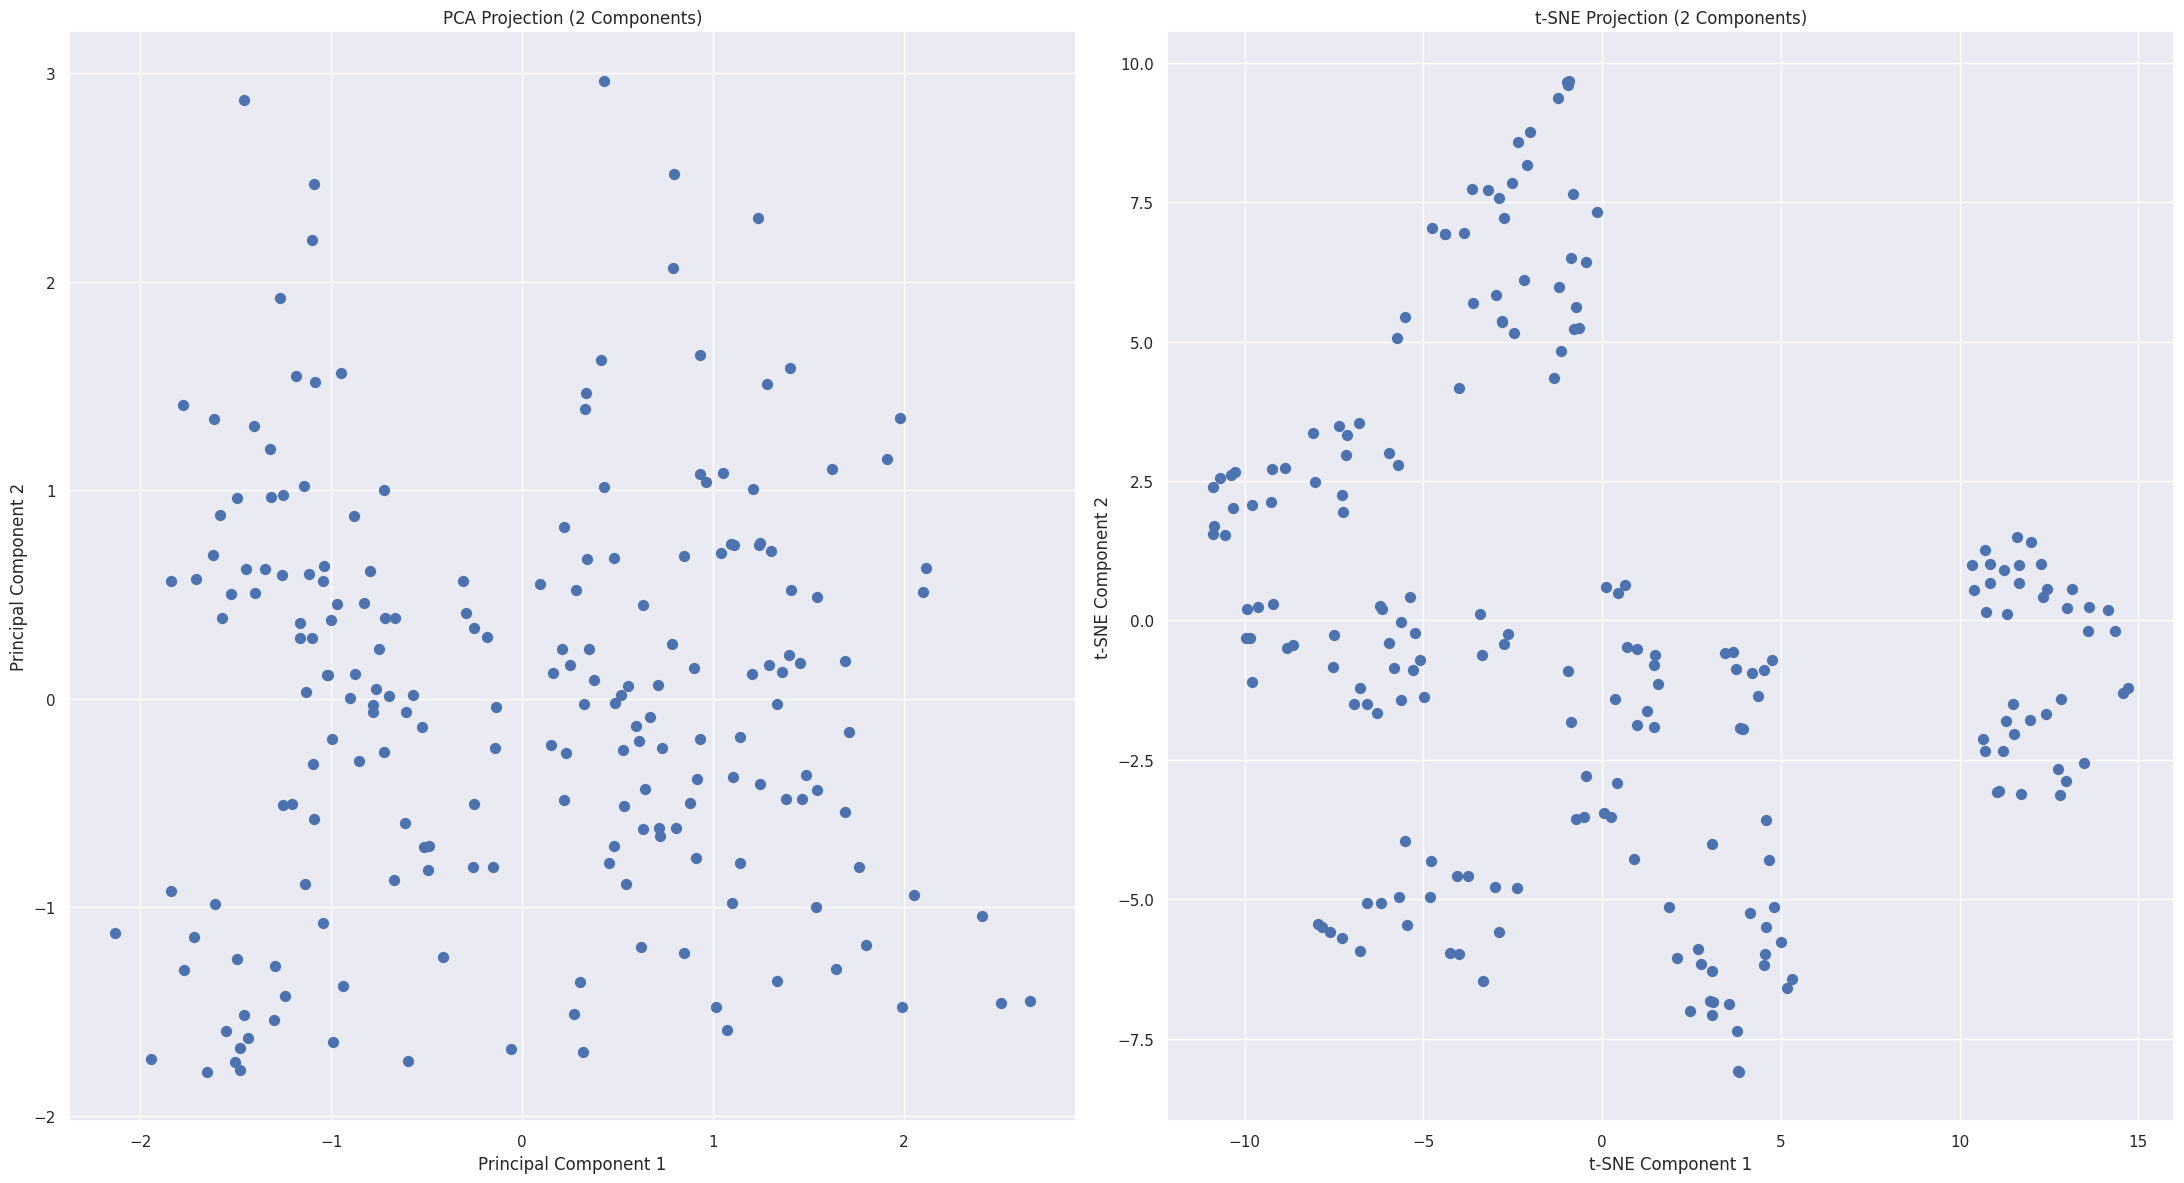

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Select all features for PCA and t-SNE
X_all_features = df_encoded.drop(columns=['Income_Spending_Cluster', 'Age_Spending_Cluster', 'All_Features_Cluster', 'PCA_KMeans_Cluster_10', 'Income_Spending_Cluster_ID', 'Income_Age_Cluster_ID', 'Income_Spending_Cluster_Label', 'Income_Age_Cluster_Label', 'All_Features_Cluster_ID', 'All_Features_Cluster_Label', 'PCA_KMeans_Cluster_4'], errors='ignore')

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_all_features)

# Apply t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300, learning_rate='auto')
tsne_components = tsne.fit_transform(X_all_features)


plt.figure(figsize=(22, 12)) # Adjust figure size for three plots in a row

# Plot 1: PCA Projection
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.scatter(pca_components[:, 0], pca_components[:, 1], s=50)
plt.title('PCA Projection (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Plot 2: t-SNE Projection
plt.subplot(1, 2, 2)
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], s=50)
plt.title('t-SNE Projection (2 Components)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

- We can clearly observe the difference between TSNE and PCA and the different clustering possibilities.

#### TSNE

Visualizing relationships between scaled features before t-SNE:


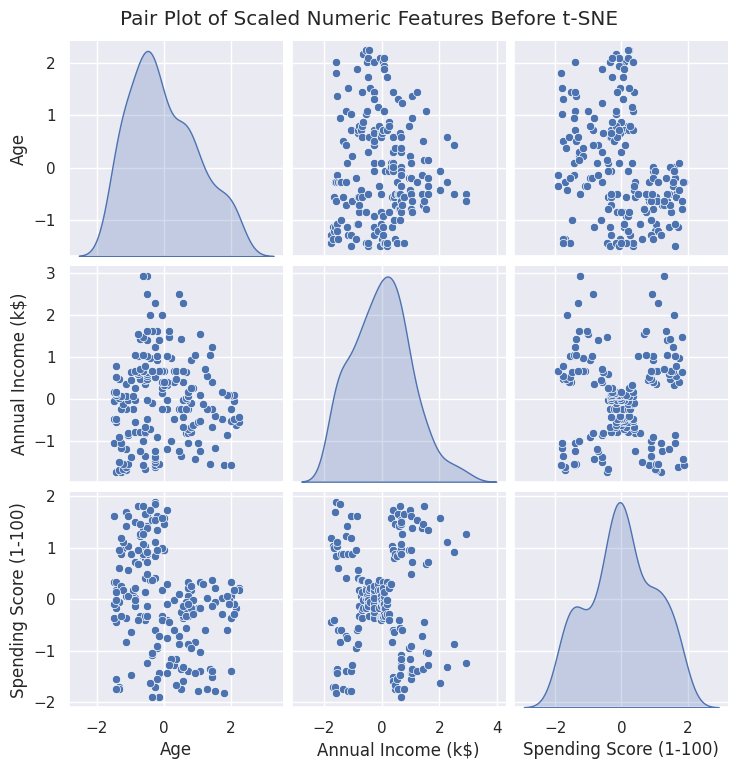

In [34]:
# Select all features for t-SNE and clustering
X_all = df_encoded.drop(columns=['Income_Spending_Cluster', 'Age_Spending_Cluster', 'Income_Age_Cluster'], errors='ignore')

# Visualization Before t-SNE (Pair Plot of original scaled features)
print("Visualizing relationships between scaled features before t-SNE:")
sns.pairplot(X_all[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Pair Plot of Scaled Numeric Features Before t-SNE', y=1.02)
plt.show()

Apply TSNE for Dimensionality Reduction and visualize the results for the dataframe with the cluster Income_Spending_Cluster.

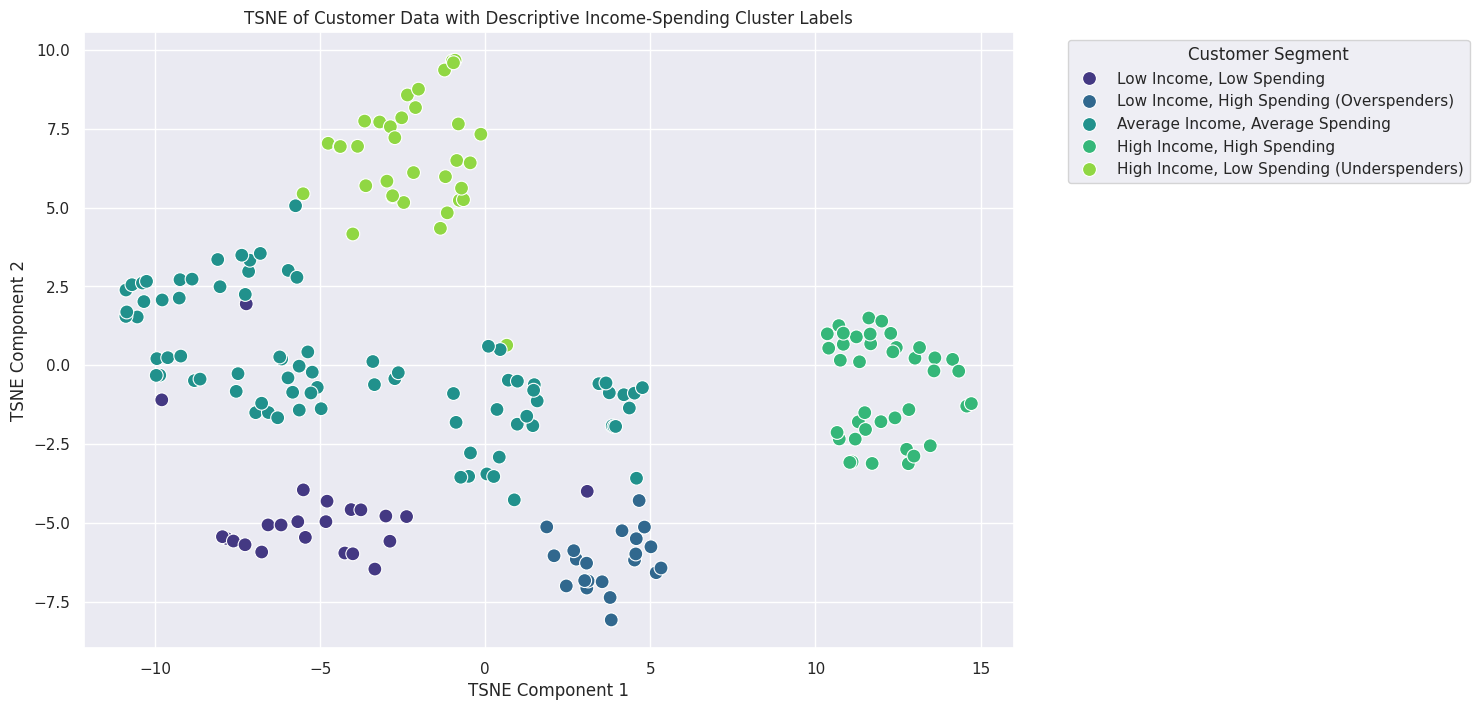

In [35]:
# Select all features for t-SNE and clustering
X_all = df_encoded.drop(columns=['Income_Spending_Cluster', 'Age_Spending_Cluster', 'All_Features_Cluster', 'PCA_KMeans_Cluster_10'], errors='ignore')

# Reduce to 2 components for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300, learning_rate='auto') # Adjust perplexity and n_iter as needed
tsne_components = tsne.fit_transform(X_all)

# Create a DataFrame with the TSNE components
tsne_df = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])

# Add the descriptive cluster labels for visualization after TSNE
# Assuming 'Income_Spending_Cluster_Label' is in the original df and aligned with the rows
tsne_df['Income_Spending_Cluster_Label'] = df['Income_Spending_Cluster_Label']

# Visualization After t-SNE with descriptive labels
plt.figure(figsize=(12, 8)) # Increased figure size for better legend readability
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Income_Spending_Cluster_Label', data=tsne_df, palette='viridis', s=100)
plt.title('TSNE of Customer Data with Descriptive Income-Spending Cluster Labels')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Use descriptive label column for hue and set legend title
plt.grid(True)
plt.show()

K-Means Clustering with All Features after TSNE.

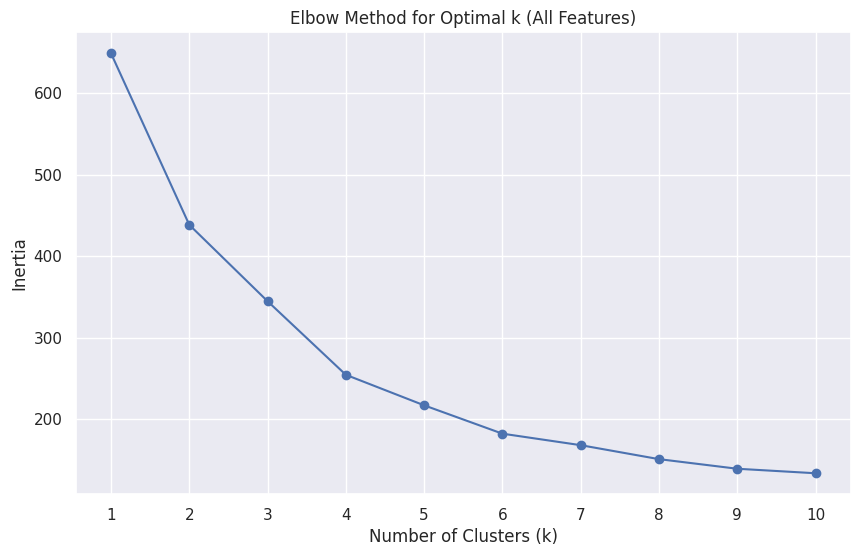

In [36]:
# Determine optimal k using Elbow method on all features
inertia_all = []
for n_clusters in range(1, 11):
    kmeans_all = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_all.fit(X_all)
    inertia_all.append(kmeans_all.inertia_)

# Plot Elbow method for all features
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_all, marker='o')
plt.title('Elbow Method for Optimal k (All Features)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

- We choose k = 4 based on the Elbow Method

In [37]:
# Choose k=4 based on the Elbow Method
n_clusters_all = 4
kmeans_all = KMeans(n_clusters=n_clusters_all, random_state=42, n_init=10)
clusters_all = kmeans_all.fit_predict(X_all)

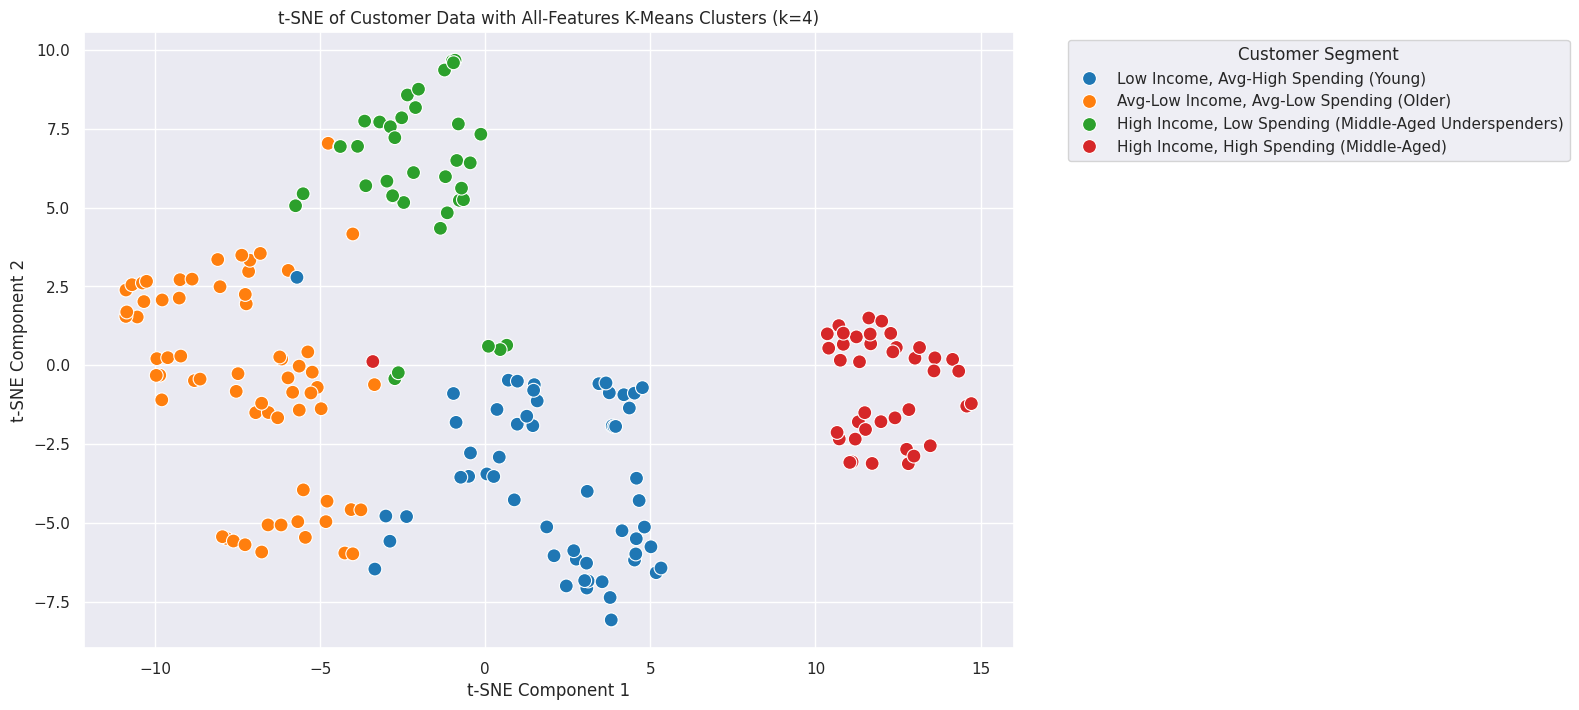

In [38]:
# Select all features for t-SNE and clustering (using the scaled data)
X_all = df_encoded.drop(columns=['Income_Spending_Cluster', 'Age_Spending_Cluster', 'All_Features_Cluster', 'PCA_KMeans_Cluster_10'], errors='ignore')

n_clusters_all = 4 # Use k=4 based on the previous analysis output provided by the user
kmeans_all = KMeans(n_clusters=n_clusters_all, random_state=42, n_init=10)
clusters_all = kmeans_all.fit_predict(X_all)

# Add the new cluster labels (numerical) to the original dataframe and df_encoded
df['All_Features_Cluster_ID'] = clusters_all
df_encoded['All_Features_Cluster_ID'] = clusters_all # Add to df_encoded for consistent feature set

cluster_labels_map_all_features = {
    0: 'High Income, High Spending (Middle-Aged)',
    1: 'Low Income, Avg-High Spending (Young)',
    2: 'High Income, Low Spending (Middle-Aged Underspenders)',
    3: 'Avg-Low Income, Avg-Low Spending (Older)'
}

# Map the numerical cluster IDs to descriptive labels
df['All_Features_Cluster_Label'] = df['All_Features_Cluster_ID'].map(cluster_labels_map_all_features)


# Apply t-SNE for Dimensionality Reduction
# Reduce to 2 components for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300, learning_rate='auto') # Adjust perplexity and n_iter as needed
tsne_components = tsne.fit_transform(X_all)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])

# Add the descriptive cluster labels to the t-SNE DataFrame for visualization
tsne_df['All_Features_Cluster_Label'] = df['All_Features_Cluster_Label']

plt.figure(figsize=(12, 8)) # Increased figure size for better legend readability
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='All_Features_Cluster_Label', data=tsne_df, palette='tab10', s=100) # Use descriptive label column for hue
plt.title('t-SNE of Customer Data with All-Features K-Means Clusters (k=4)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Set legend title and position
plt.grid(True)
plt.show()

In [39]:
# Display Characteristics of the Clusters
print(f"\nCluster Characteristics (K-Means on All Features) for k={n_clusters_all}:")

# Display mean of scaled features from df_encoded_with_clusters (which is now df_encoded after adding cluster column)
print("\nMean of Scaled Features per Cluster:")
# Select relevant scaled features from df_encoded, excluding potentially confounding added cluster columns
scaled_features_for_mean = df_encoded.columns.tolist()
scaled_features_for_mean = [col for col in scaled_features_for_mean if col not in ['Income_Spending_Cluster', 'Age_Spending_Cluster', 'PCA_KMeans_Cluster_10', 'All_Features_Cluster_ID']] # Exclude numerical ID column
print(df_encoded.groupby('All_Features_Cluster_ID')[scaled_features_for_mean].mean())

# Display mean of original features from the original df
print("\nMean of Original Features per Cluster:")
print(df.groupby('All_Features_Cluster_ID')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Characteristics (K-Means on All Features) for k=4:

Mean of Scaled Features per Cluster:
                              Age  Annual Income (k$)  Spending Score (1-100)  \
All_Features_Cluster_ID                                                         
0                       -0.428806            0.974847                1.216085   
1                       -0.962492           -0.784763                0.392030   
2                        0.037205            0.990115               -1.188757   
3                        1.086161           -0.490565               -0.397174   

                         Genre_Male  
All_Features_Cluster_ID              
0                          0.450000  
1                          0.403509  
2                          0.500000  
3                          0.430769  

Mean of Original Features per Cluster:
                               Age  Annual Income (k$)  Spending Score (1-100)
All_Features_Cluster_ID                                             

#### PCA

In [40]:
pca_proj = PCA(n_components=2).fit_transform(df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']])

Visualize the PCA projection of data with all encoded features of the dataframe.

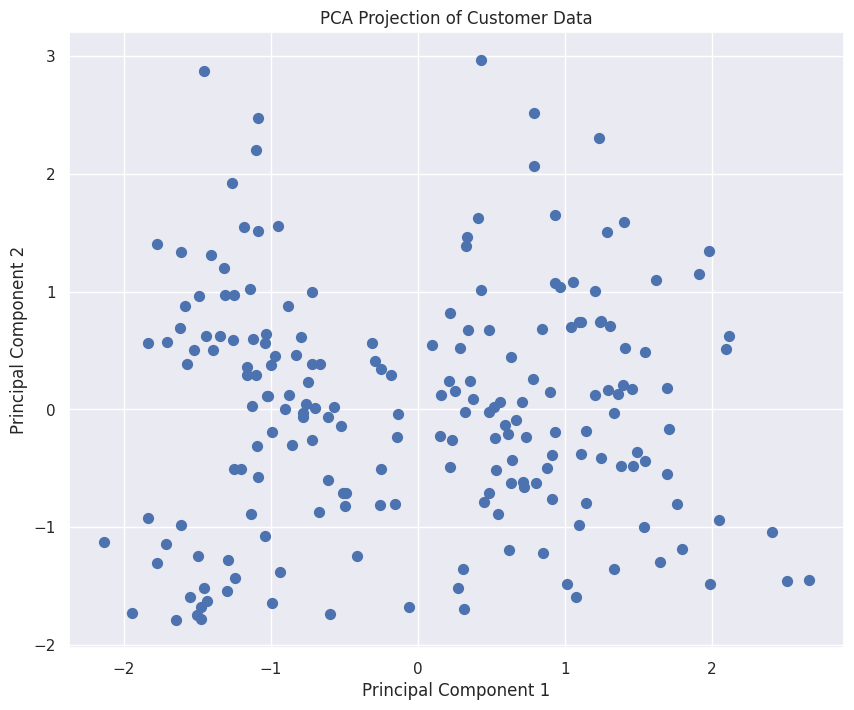

In [41]:
# Visualize the data in the reduced dimension space without coloring by cluster
plt.figure(figsize=(10, 8))
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], s=50) # Use a single color for all points
plt.title('PCA Projection of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Choose the number of clusters k based on the Silhouette Method.

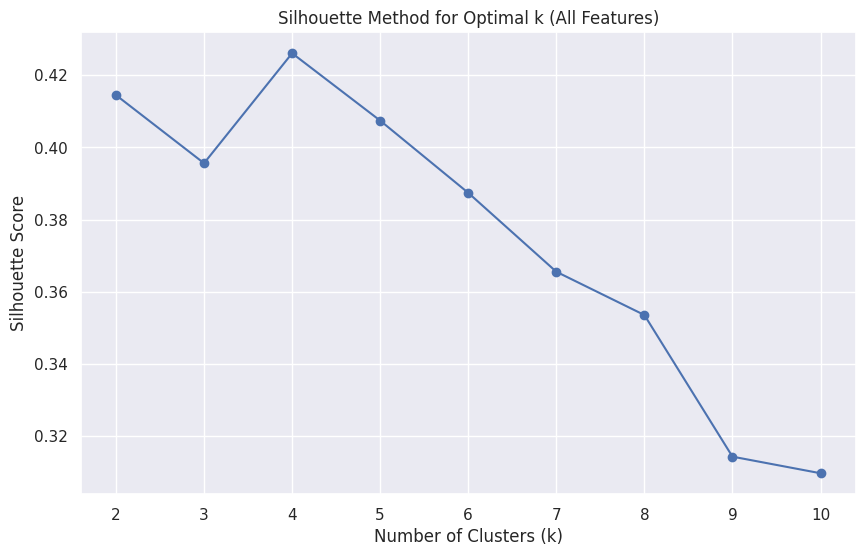


Optimal number of clusters based on Silhouette Method (All Features): 4


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select all features for clustering (using the scaled data from df_encoded)
X_all = df_encoded.drop(columns=['Income_Spending_Cluster', 'Age_Spending_Cluster', 'All_Features_Cluster', 'PCA_KMeans_Cluster_10'], errors='ignore')

# Determine the optimal number of clusters using the Silhouette Method
silhouette_scores_all = []
# Silhouette score is not defined for k=1, and typically we look at a reasonable range
# Let's check k from 2 up to 10
for n_clusters in range(2, 11):
    kmeans_all = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters_all = kmeans_all.fit_predict(X_all)
    score = silhouette_score(X_all, clusters_all)
    silhouette_scores_all.append(score)

# Plot the silhouette method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_all, marker='o')
plt.title('Silhouette Method for Optimal k (All Features)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the number of clusters with the highest silhouette score
if silhouette_scores_all: # Check if the list is not empty
    optimal_k_silhouette_all = range(2, 11)[np.argmax(silhouette_scores_all)]
    print(f"\nOptimal number of clusters based on Silhouette Method (All Features): {optimal_k_silhouette_all}")
else:
    print("\nCould not calculate silhouette scores.")

- We see that the best number for k is 4.

In [43]:
# Compute the clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(pca_proj)

In [44]:
# Display the cluster assignments
print(clusters)

[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 2 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 3 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 1 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Plot the clusters after PCA with all features.

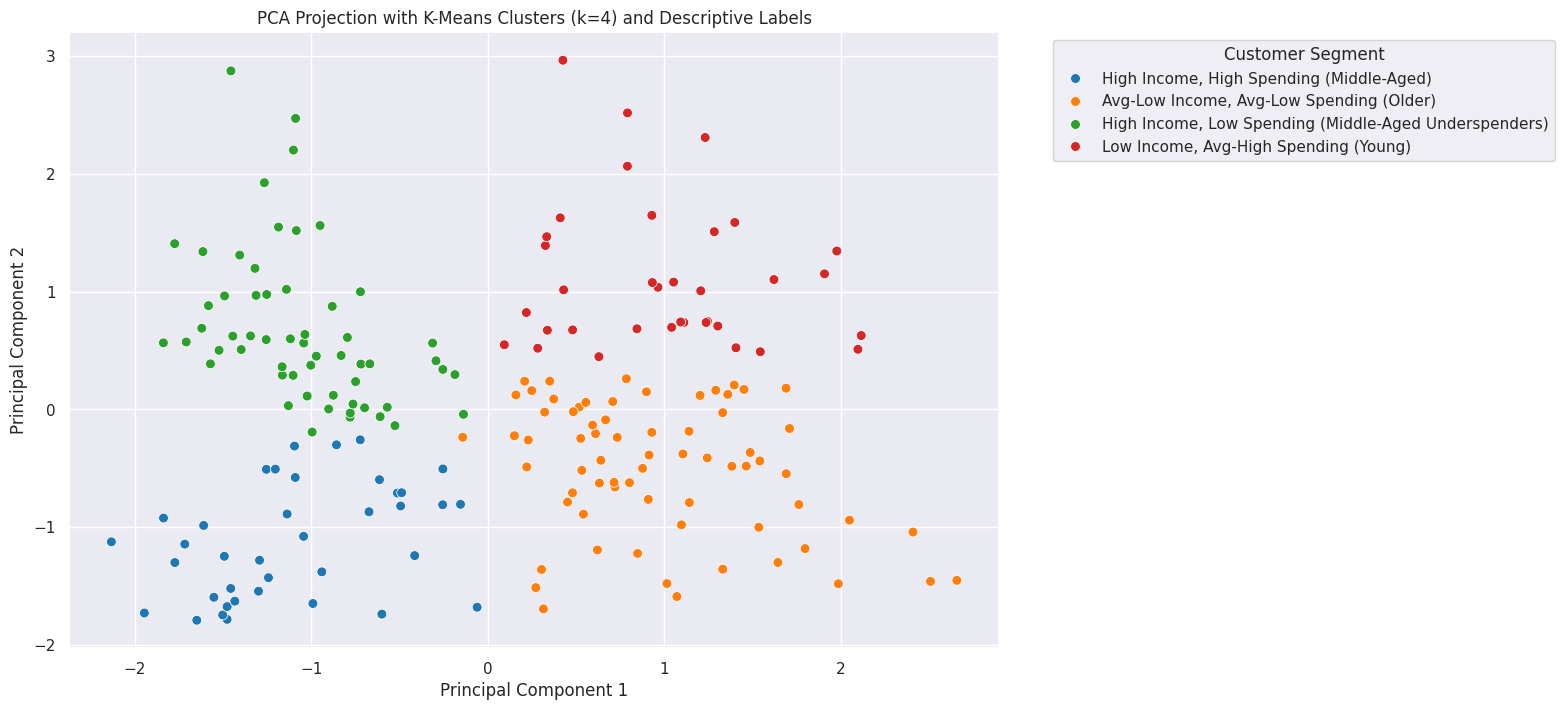

In [45]:
# Perform K-Means clustering on the PCA-reduced data with k=4
n_clusters_pca = 4 # Use k=4 based on the Silhouette Method for all features
kmeans_pca = KMeans(n_clusters=n_clusters_pca, random_state=0, n_init=10)
clusters_pca = kmeans_pca.fit_predict(pca_proj)

# Add the numerical cluster labels to a DataFrame with PCA components
pca_df = pd.DataFrame(data = pca_proj, columns = ['principal component 1', 'principal component 2'])
pca_df['PCA_KMeans_Cluster_ID_4'] = clusters_pca

cluster_labels_map_pca_kmeans_4 = {
    0: 'High Income, High Spending (Middle-Aged)',
    1: 'Low Income, Avg-High Spending (Young)',
    2: 'High Income, Low Spending (Middle-Aged Underspenders)',
    3: 'Avg-Low Income, Avg-Low Spending (Older)'
}

# Map the numerical cluster IDs to descriptive labels
pca_df['PCA_KMeans_Cluster_Label_4'] = pca_df['PCA_KMeans_Cluster_ID_4'].map(cluster_labels_map_pca_kmeans_4)


# Plot the clusters after PCA with k=4, colored by descriptive labels
plt.figure(figsize=(12, 8)) # Increased figure size for better legend readability
sns.scatterplot(x='principal component 1', y='principal component 2', hue='PCA_KMeans_Cluster_Label_4', data=pca_df, palette='tab10', s=50)
plt.title('PCA Projection with K-Means Clusters (k=4) and Descriptive Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend with descriptive labels and set title/position
plt.grid(True)
plt.show()

# Add the cluster labels back to the original df for interpretation
df['PCA_KMeans_Cluster_4'] = clusters_pca


- The plot shows 4 different clusters which are pretty well separated and give off a roughly spherical shape, with tightly grouped points.

We will interpret the plot by displaying the cluster characteristics.

In [46]:
# Add the cluster labels from K-Means on PCA to the original and encoded dataframes
df['PCA_KMeans_Cluster_10'] = clusters
df_encoded['PCA_KMeans_Cluster_10'] = clusters

print("Cluster Characteristics:")

# Display mean of original features per cluster
print("\nMean of Original Features per Cluster:")
print(df.groupby('PCA_KMeans_Cluster_10')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Display mean of scaled features per cluster
print("\nMean of Scaled Features per Cluster:")
# Select relevant scaled features from df_encoded, excluding potentially confounding added cluster columns
scaled_features_for_mean = df_encoded.columns.tolist()
scaled_features_for_mean = [col for col in scaled_features_for_mean if col not in ['Income_Spending_Cluster', 'Age_Spending_Cluster', 'All_Features_Cluster', 'Income_Spending_Cluster_ID', 'Income_Age_Cluster_ID', 'Income_Spending_Cluster_Label', 'Income_Age_Cluster_Label', 'PCA_KMeans_Cluster_10']]
print(df_encoded.groupby('PCA_KMeans_Cluster_10')[scaled_features_for_mean].mean())

# Display gender distribution per cluster
print("\nGender Distribution per Cluster:")
print(df_encoded.groupby('PCA_KMeans_Cluster_10')['Genre_Male'].value_counts(normalize=True).unstack(fill_value=0))

Cluster Characteristics:

Mean of Original Features per Cluster:
                             Age  Annual Income (k$)  Spending Score (1-100)
PCA_KMeans_Cluster_10                                                       
0                      52.144928           46.333333               40.072464
1                      29.932203           78.661017               70.491525
2                      25.594595           32.054054               67.864865
3                      41.685714           88.228571               17.285714

Mean of Scaled Features per Cluster:
                            Age  Annual Income (k$)  Spending Score (1-100)  \
PCA_KMeans_Cluster_10                                                         
0                      0.954133           -0.543024               -0.393167   
1                     -0.640001            0.690905                0.787749   
2                     -0.951297           -1.088056                0.685778   
3                      0.203510         

**Interpretation:**

- Cluster 0: Represents Older, Average-Low Income, Average-Low Spending Customers. This group is predominantly female and likely includes customers with moderate income and spending habits, potentially retirees.
- Cluster 1: This cluster represents Young to Middle-Aged, High Income, High Spending Customers. They are a profitable segment with high earning potential and high spending habits, with a higher proportion of females.
- Cluster 2: This segment consists of Young, Low Income, High Spending Customers (Overspenders). This is a counterintuitive segment of younger individuals with limited income who are high spenders. This group is predominantly female.
- Cluster 3: This cluster represents Middle-Aged, Very High Income, Very Low Spending Customers (Underspenders). These are high earners who are not spending much at the mall, with a notable presence of males in this group.


----------------------------
## 2️⃣ Gaussian Mixture Model (GMM)
------------------------------

### GMM all features

Compute the AIC and BIC for GMM to see what is the best number of components.



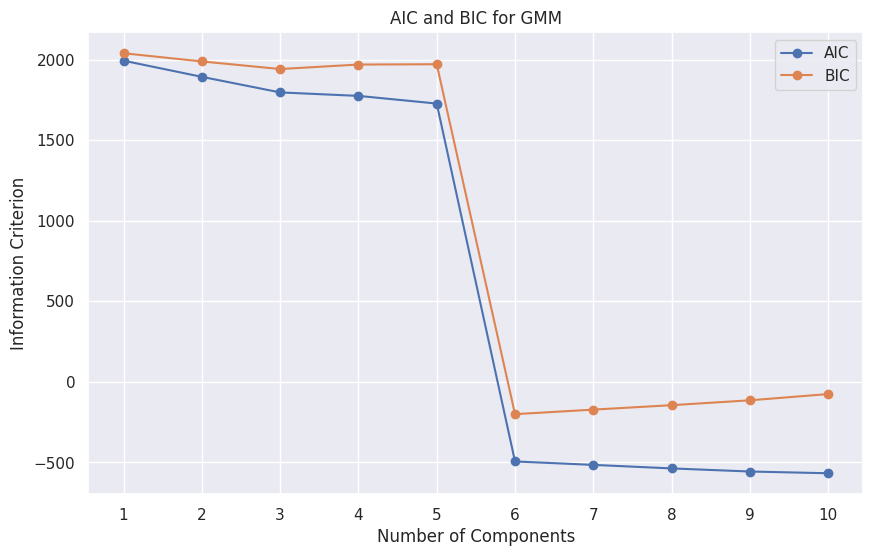


Optimal number of components based on AIC: 10
Optimal number of components based on BIC: 6


In [47]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Select the features for GMM
X_gmm = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

# Determine the optimal number of components using AIC and BIC
n_components_range = range(1, 11) # Check from 1 to 10 components
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=10) # Use n_init for robustness
    gmm.fit(X_gmm)
    aic.append(gmm.aic(X_gmm))
    bic.append(gmm.bic(X_gmm))

# Plot AIC and BIC results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.title('AIC and BIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components that minimizes AIC and BIC
optimal_n_components_aic = n_components_range[np.argmin(aic)]
optimal_n_components_bic = n_components_range[np.argmin(bic)]

print(f"\nOptimal number of components based on AIC: {optimal_n_components_aic}")
print(f"Optimal number of components based on BIC: {optimal_n_components_bic}")

Create the GMM with 6 components.

In [48]:
from sklearn.mixture import GaussianMixture

# Select the features for GMM
X_gmm = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]
optimal_n_components = 6
# Apply GMM clustering with the optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42, n_init=10) # Using n_init for robustness
gmm.fit(X_gmm)


GaussianMixture(n_components=6, n_init=10, random_state=42)

In [49]:
gmm_clusters = gmm.predict(X_gmm)
gmm_clusters

array([4, 4, 2, 1, 3, 1, 2, 1, 4, 1, 4, 1, 2, 1, 4, 4, 3, 4, 4, 1, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 1, 4, 1, 4, 4, 2, 1, 2, 1, 2, 1, 2, 4, 4, 3,
       2, 1, 5, 3, 3, 3, 5, 4, 3, 4, 5, 4, 5, 4, 1, 4, 4, 4, 5, 5, 4, 4,
       5, 5, 4, 3, 4, 5, 5, 5, 4, 4, 5, 4, 1, 5, 4, 4, 4, 5, 1, 4, 5, 1,
       3, 5, 5, 4, 4, 5, 5, 4, 5, 1, 4, 4, 1, 5, 4, 4, 4, 1, 5, 4, 4, 4,
       4, 1, 5, 4, 1, 1, 5, 5, 5, 5, 4, 5, 3, 4, 1, 3, 4, 4, 4, 4, 4, 4,
       1, 3, 4, 3, 0, 4, 4, 3, 0, 4, 1, 3, 4, 4, 4, 3, 0, 4, 4, 4, 0, 3,
       0, 3, 4, 3, 4, 3, 5, 3, 4, 3, 4, 3, 4, 3, 0, 4, 4, 4, 4, 4, 0, 3,
       4, 4, 4, 4, 0, 3, 4, 3, 0, 4, 0, 4, 0, 3, 0, 3, 4, 3, 0, 3, 0, 4,
       4, 4])

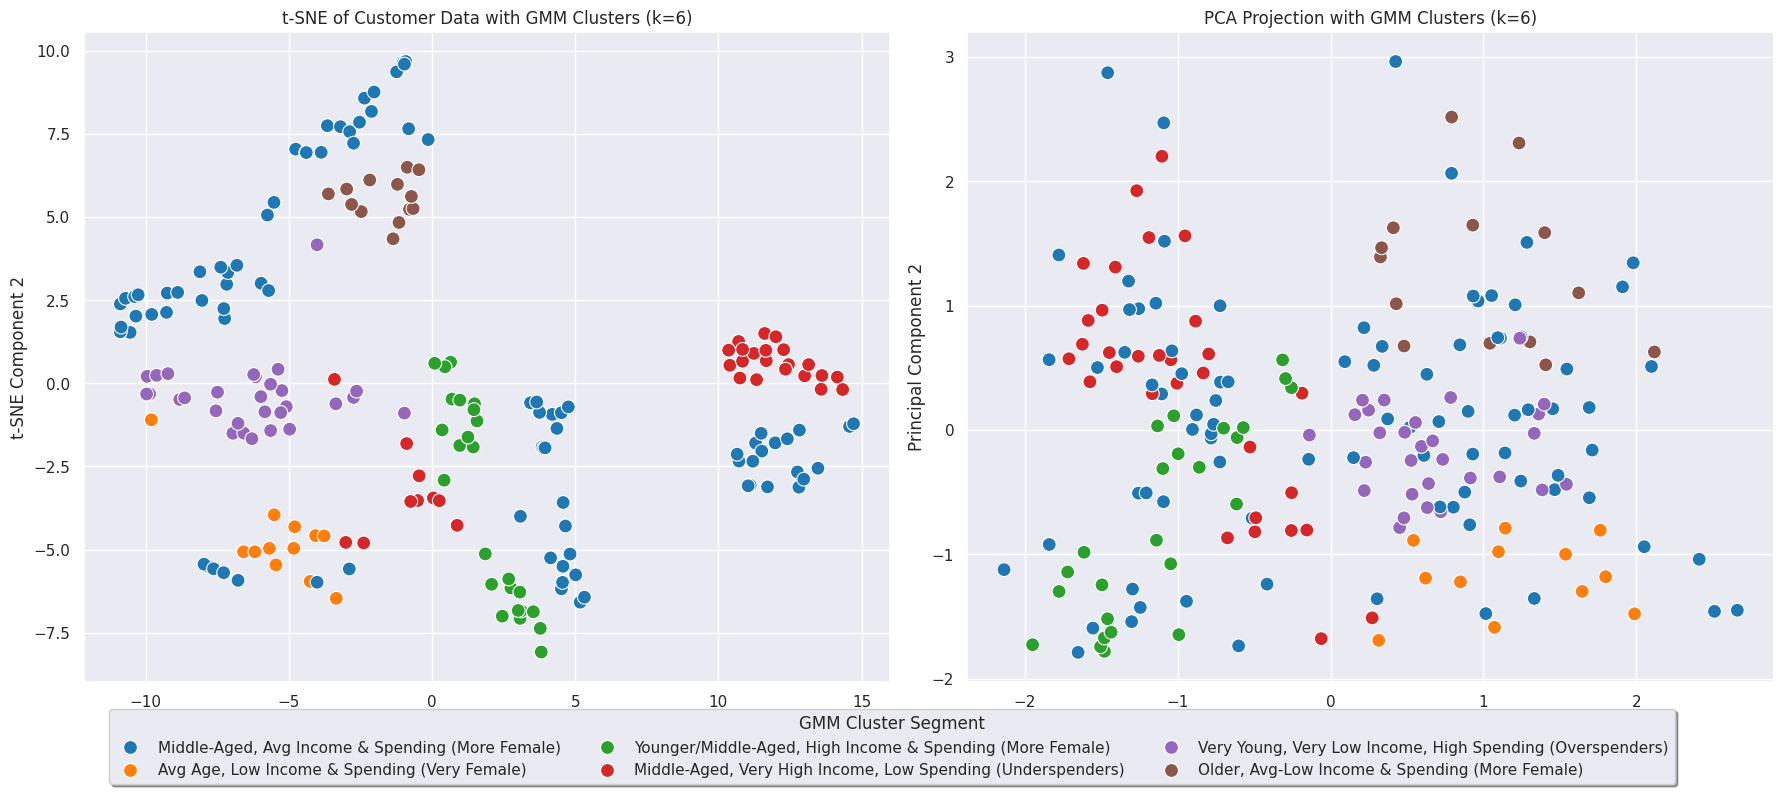

In [50]:
# Add the GMM cluster labels (numerical) to the original dataframe and df_encoded
df['GMM_Cluster_ID'] = gmm_clusters
df_encoded['GMM_Cluster_ID'] = gmm_clusters

cluster_labels_map_gmm = {
    0: 'Older, Avg-Low Income & Spending (More Female)',
    1: 'Younger/Middle-Aged, High Income & Spending (More Female)',
    2: 'Avg Age, Low Income & Spending (Very Female)',
    3: 'Middle-Aged, Very High Income, Low Spending (Underspenders)',
    4: 'Middle-Aged, Avg Income & Spending (More Female)',
    5: 'Very Young, Very Low Income, High Spending (Overspenders)'
}

# Map the numerical cluster IDs to descriptive labels
df['GMM_Cluster_Label'] = df['GMM_Cluster_ID'].map(cluster_labels_map_gmm)

# Apply t-SNE for Dimensionality Reduction to 2 Components
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300, learning_rate='auto')
tsne_components = tsne.fit_transform(X_gmm)

# Apply PCA for Dimensionality Reduction to 2 Components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_gmm)


# Visualize GMM Clusters on t-SNE and PCA Projections
plt.figure(figsize=(18, 8)) # Adjusted figure size for side-by-side plots


# Plot 1: t-SNE Projection with GMM Clusters
ax1 = plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
tsne_df_gmm = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
tsne_df_gmm['GMM_Cluster_Label'] = df['GMM_Cluster_Label'] # Add descriptive GMM cluster labels

sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='GMM_Cluster_Label', data=tsne_df_gmm, palette='tab10', s=100, ax=ax1)
plt.title(f't-SNE of Customer Data with GMM Clusters (k={optimal_n_components})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
ax1.legend().remove() # Remove legend from the first plot


# Plot 2: PCA Projection with GMM Clusters
ax2 = plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
pca_df_gmm = pd.DataFrame(data = pca_components, columns = ['principal component 1', 'principal component 2'])
pca_df_gmm['GMM_Cluster_Label'] = df['GMM_Cluster_Label'] # Add descriptive GMM cluster labels

sns.scatterplot(x='principal component 1', y='principal component 2', hue='GMM_Cluster_Label', data=pca_df_gmm, palette='tab10', s=100, ax=ax2)
plt.title(f'PCA Projection with GMM Clusters (k={optimal_n_components})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax2.legend().remove()


# Create a single legend below the plots
handles, labels_list = ax1.get_legend_handles_labels() # Get handles and labels from one of the plots
plt.figlegend(handles, labels_list, loc='lower center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=3, title='GMM Cluster Segment') # Position legend below


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Display the characteristics of the GMM Clusters.


In [51]:
print(f"\nCluster Characteristics (GMM with k={optimal_n_components}):")

# Display mean of original features per cluster
print("\nMean of Original Features per Cluster:")
print(df.groupby('GMM_Cluster_ID')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Display mean of scaled features per cluster
print("\nMean of Scaled Features per Cluster:")
# Select relevant scaled features from df_encoded, excluding potentially confounding added cluster columns
scaled_features_for_mean = X_gmm.columns.tolist() # Use columns from X_gmm which are the features used
print(df_encoded.groupby('GMM_Cluster_ID')[scaled_features_for_mean].mean())

# Display gender distribution per cluster
print("\nGender Distribution per Cluster:")
print(df_encoded.groupby('GMM_Cluster_ID')['Genre_Male'].value_counts(normalize=True).unstack(fill_value=0))


Cluster Characteristics (GMM with k=6):

Mean of Original Features per Cluster:
                      Age  Annual Income (k$)  Spending Score (1-100)
GMM_Cluster_ID                                                       
0               43.785714           93.285714               20.642857
1               24.115385           43.846154               63.461538
2               44.916667           28.750000               19.083333
3               32.161290           71.677419               71.000000
4               39.806818           62.227273               48.511364
5               51.413793           55.965517               48.344828

Mean of Scaled Features per Cluster:
                     Age  Annual Income (k$)  Spending Score (1-100)  \
GMM_Cluster_ID                                                         
0               0.354220            1.249122               -1.147454   
1              -1.057455           -0.637958                0.514834   
2               0.435385         

- We can observe from the plot that GMM for all features doesn't define the clusters very well comparative to Kmeans.

### GMM Annual Income vs Spending Score

Compute the AIC and BIC for GMM to see what is the best number of components.


Computing AIC and BIC for GMM on Annual Income vs Spending Score...


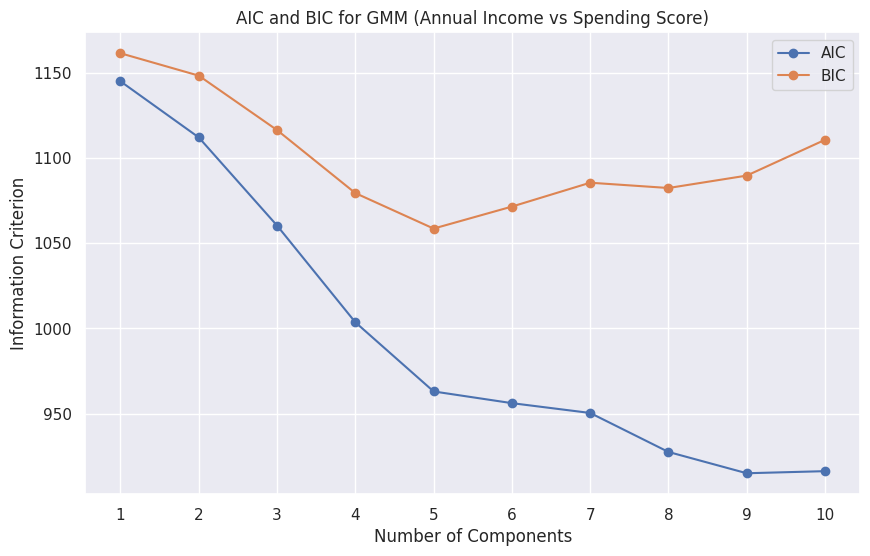


Optimal number of components based on BIC (Annual Income vs Spending Score): 5


In [52]:
# Select the features for GMM (Annual Income vs Spending Score)
X_income_spending = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# --- Determine the optimal number of components for GMM on Income vs Spending ---
n_components_range = range(1, 11)
aic_is = []
bic_is = []

print("Computing AIC and BIC for GMM on Annual Income vs Spending Score...")

for n_components in n_components_range:
    gmm_is = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm_is.fit(X_income_spending)
    aic_is.append(gmm_is.aic(X_income_spending))
    bic_is.append(gmm_is.bic(X_income_spending))

# Plot AIC and BIC results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_is, marker='o', label='AIC')
plt.plot(n_components_range, bic_is, marker='o', label='BIC')
plt.title('AIC and BIC for GMM (Annual Income vs Spending Score)')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components that minimizes BIC
optimal_n_components_is = n_components_range[np.argmin(bic_is)]
print(f"\nOptimal number of components based on BIC (Annual Income vs Spending Score): {optimal_n_components_is}")


Applying GMM with 5 components on Annual Income vs Spending Score...


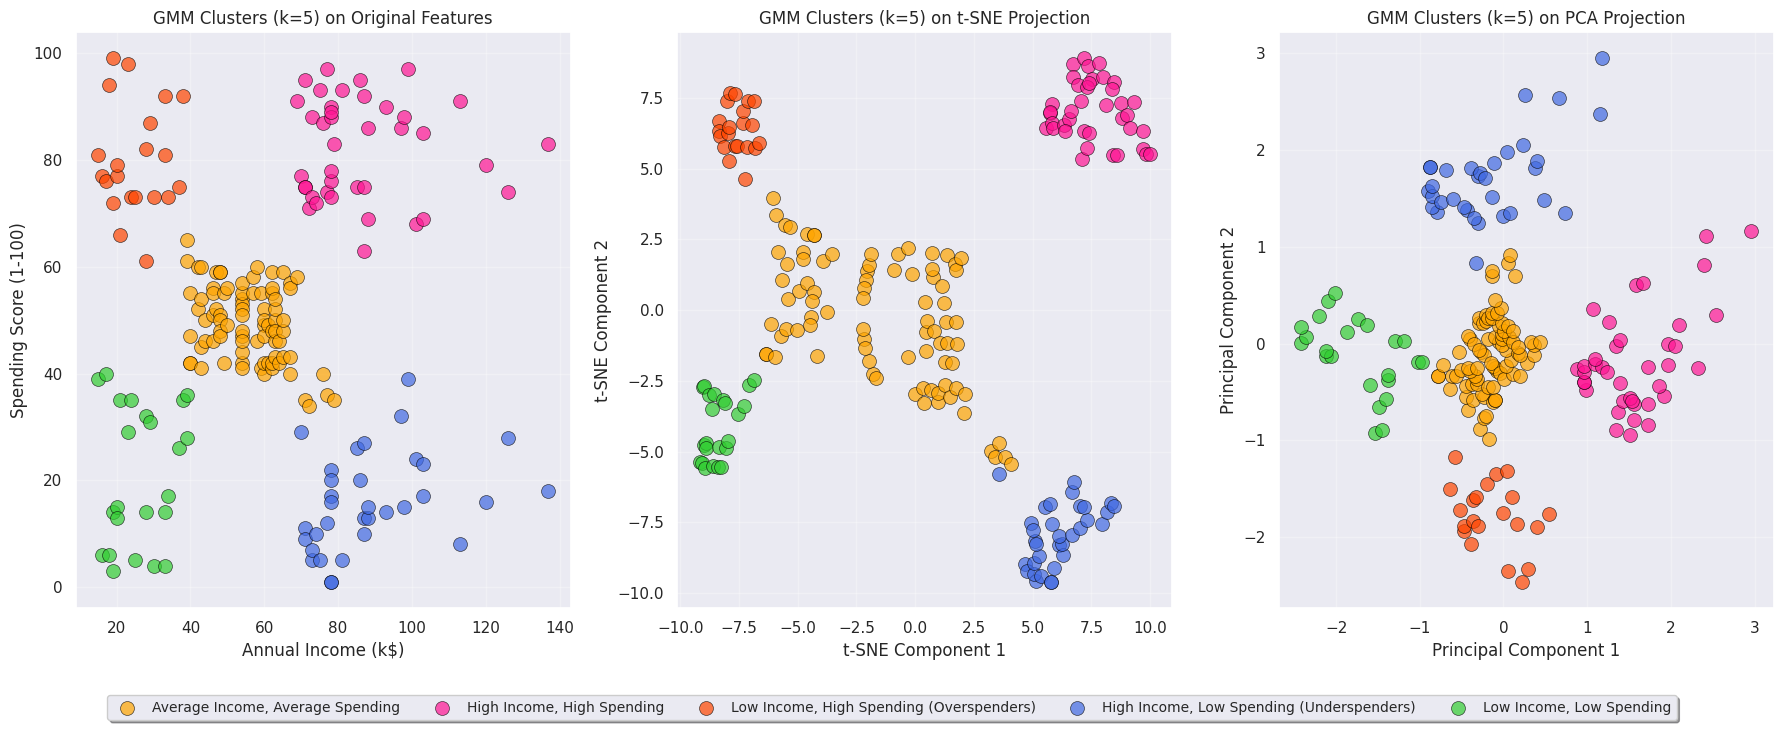

In [53]:
# Based on the characteristics, define descriptive labels for each cluster ID
cluster_labels_map = {
    0: 'Average Income, Average Spending',
    1: 'High Income, High Spending',
    2: 'Low Income, High Spending (Overspenders)',
    3: 'High Income, Low Spending (Underspenders)',
    4: 'Low Income, Low Spending'
}

# Apply GMM Clustering with the optimal number of components
print(f"\nApplying GMM with {optimal_n_components_is} components on Annual Income vs Spending Score...")
gmm_is = GaussianMixture(n_components=optimal_n_components_is, random_state=42, n_init=10)
gmm_is.fit(X_income_spending)
gmm_clusters_is = gmm_is.predict(X_income_spending)

# Add the GMM cluster labels to the original dataframe
df['GMM_Income_Spending_Cluster_ID'] = gmm_clusters_is

# Map cluster IDs to descriptive labels
df['GMM_Income_Spending_Cluster_Label'] = df['GMM_Income_Spending_Cluster_ID'].map(cluster_labels_map)

# Apply TSNE and PCA
tsne_is = TSNE(n_components=2, random_state=42, perplexity=min(30, len(X_income_spending)-1), max_iter=300, learning_rate='auto')
tsne_components_is = tsne_is.fit_transform(X_income_spending)

pca_is = PCA(n_components=2, random_state=42)
pca_components_is = pca_is.fit_transform(X_income_spending)

# Define a custom color palette for the 5 clusters
cluster_colors = {
    0: '#FFA500',  # Orange - Average
    1: '#FF1493',  # Deep Pink - High Income, High Spending
    2: '#FF4500',  # Red-Orange - Overspenders
    3: '#4169E1',  # Royal Blue - Underspenders
    4: '#32CD32'   # Lime Green - Low Income, Low Spending
}

# Visualize GMM Clusters
fig = plt.figure(figsize=(18, 7))

# Plot 1: Original Scatter Plot with GMM Clusters
plt.subplot(1, 3, 1)
for cluster_id in sorted(df['GMM_Income_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['GMM_Income_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                c=cluster_colors[cluster_id],
                s=100,
                label=cluster_labels_map[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_is}) on Original Features')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Plot 2: t-SNE Projection with GMM Clusters
plt.subplot(1, 3, 2)
tsne_df_is = pd.DataFrame(data=tsne_components_is, columns=['tsne component 1', 'tsne component 2'])
tsne_df_is['GMM_Income_Spending_Cluster_ID'] = df['GMM_Income_Spending_Cluster_ID'].values

for cluster_id in sorted(tsne_df_is['GMM_Income_Spending_Cluster_ID'].unique()):
    cluster_data = tsne_df_is[tsne_df_is['GMM_Income_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['tsne component 1'],
                cluster_data['tsne component 2'],
                c=cluster_colors[cluster_id],
                s=100,
                label=cluster_labels_map[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_is}) on t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

# Plot 3: PCA Projection with GMM Clusters
plt.subplot(1, 3, 3)
pca_df_is = pd.DataFrame(data=pca_components_is, columns=['principal component 1', 'principal component 2'])
pca_df_is['GMM_Income_Spending_Cluster_ID'] = df['GMM_Income_Spending_Cluster_ID'].values

for cluster_id in sorted(pca_df_is['GMM_Income_Spending_Cluster_ID'].unique()):
    cluster_data = pca_df_is[pca_df_is['GMM_Income_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['principal component 1'],
                cluster_data['principal component 2'],
                c=cluster_colors[cluster_id],
                s=100,
                label=cluster_labels_map[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_is}) on PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)

# Add a shared legend below all plots
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=5,
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the legend
plt.show()

- We can see from the plot that the GMM separates as well as Kmeans the clusters in this case (Annual Income vs Spending Score)

Display the characteristics of the GMM Clusters.

In [54]:
# Display Characteristics of the GMM Clusters (Income vs Spending)
print(f"\nCluster Characteristics (GMM with k={optimal_n_components_is}, Income vs Spending):")
print(df.groupby('GMM_Income_Spending_Cluster_ID')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Characteristics (GMM with k=5, Income vs Spending):
                                Annual Income (k$)  Spending Score (1-100)
GMM_Income_Spending_Cluster_ID                                            
0                                        55.642857               49.369048
1                                        86.538462               82.128205
2                                        25.095238               80.047619
3                                        88.818182               16.000000
4                                        26.304348               20.913043


### GMM Annual Income vs Age

Compute the AIC and BIC for GMM to see what is the best number of components.

Computing AIC and BIC for GMM on Annual Income vs Age...


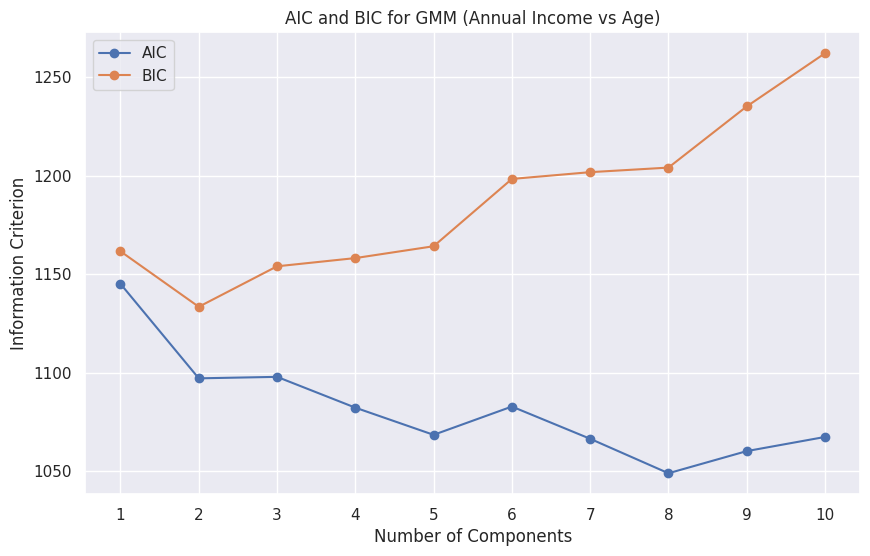


Optimal number of components based on BIC (Annual Income vs Age): 2


In [55]:
# Select the features for GMM (Annual Income vs Age)
X_income_age = df_encoded[['Annual Income (k$)', 'Age']]

# Determine the optimal number of components for GMM on Income vs Age
n_components_range = range(1, 11)
aic_ia = []
bic_ia = []

print("Computing AIC and BIC for GMM on Annual Income vs Age...")

for n_components in n_components_range:
    gmm_ia = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm_ia.fit(X_income_age)
    aic_ia.append(gmm_ia.aic(X_income_age))
    bic_ia.append(gmm_ia.bic(X_income_age))

# Plot AIC and BIC results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_ia, marker='o', label='AIC')
plt.plot(n_components_range, bic_ia, marker='o', label='BIC')
plt.title('AIC and BIC for GMM (Annual Income vs Age)')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components that minimizes BIC
optimal_n_components_ia = n_components_range[np.argmin(bic_ia)]
print(f"\nOptimal number of components based on BIC (Annual Income vs Age): {optimal_n_components_ia}")


Applying GMM with 2 components on Annual Income vs Age...


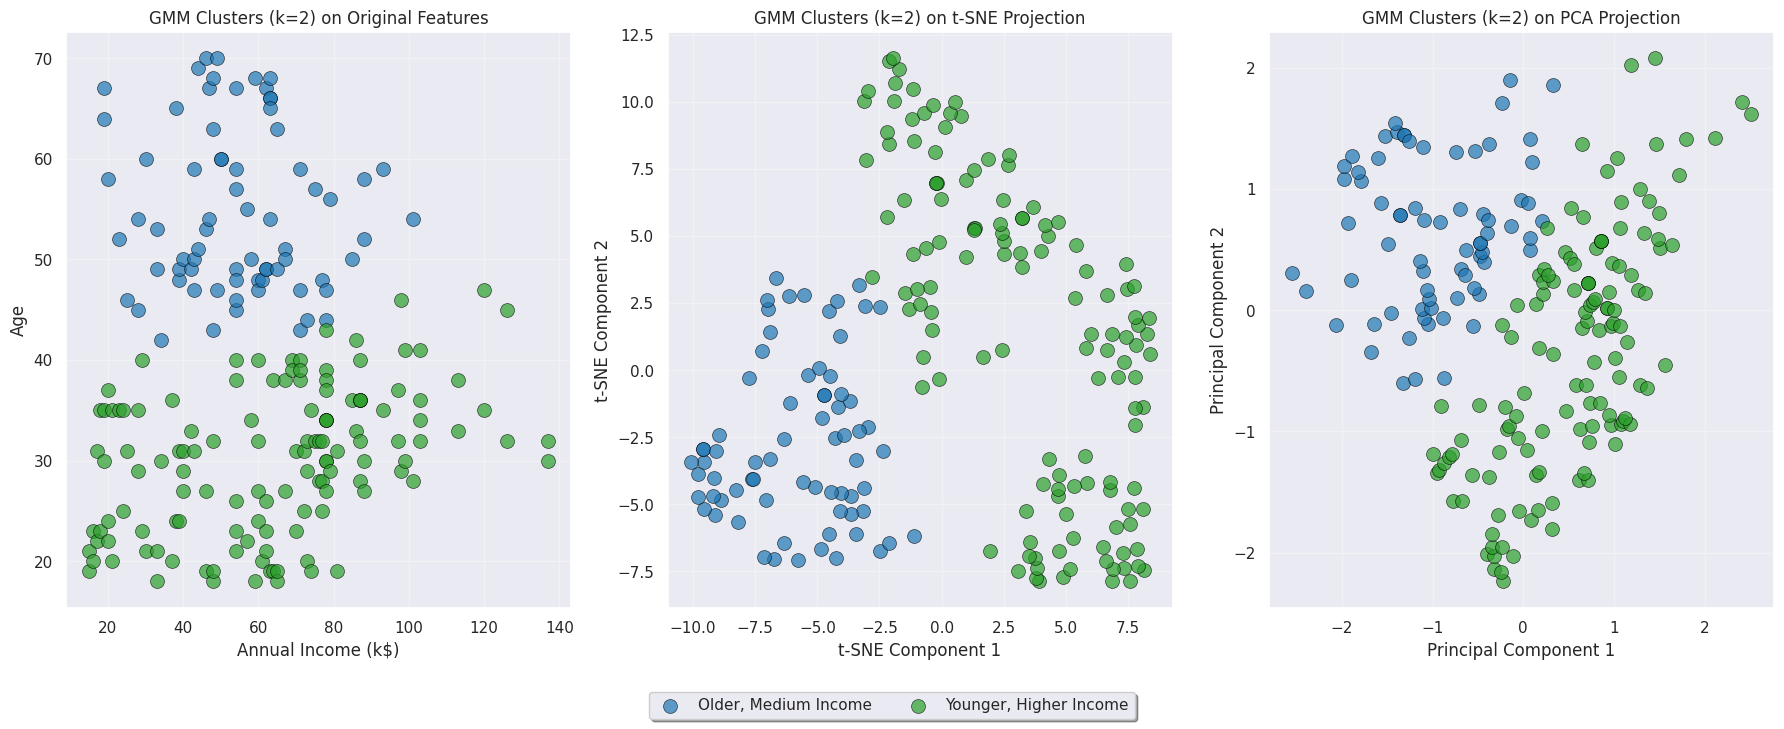

In [56]:
# Based on the characteristics, define descriptive labels for Income vs Age clusters
cluster_labels_map_ia = {
    0: 'Older, Medium Income',
    1: 'Younger, Higher Income'
}

# Apply GMM Clustering with the optimal number of components
print(f"\nApplying GMM with {optimal_n_components_ia} components on Annual Income vs Age...")
gmm_ia = GaussianMixture(n_components=optimal_n_components_ia, random_state=42, n_init=10)
gmm_ia.fit(X_income_age)
gmm_clusters_ia = gmm_ia.predict(X_income_age)

# Add the GMM cluster labels to the original dataframe
df['GMM_Income_Age_Cluster_ID'] = gmm_clusters_ia

# Map cluster IDs to descriptive labels
df['GMM_Income_Age_Cluster_Label'] = df['GMM_Income_Age_Cluster_ID'].map(cluster_labels_map_ia)

# Apply t-SNE and PCA for Visualization (on Income vs Age features)
tsne_ia = TSNE(n_components=2, random_state=42, perplexity=min(30, len(X_income_age)-1), max_iter=300, learning_rate='auto')
tsne_components_ia = tsne_ia.fit_transform(X_income_age)

pca_ia = PCA(n_components=2, random_state=42)
pca_components_ia = pca_ia.fit_transform(X_income_age)

# Define a custom color palette for the 2 clusters
cluster_colors_ia = {
    0: '#1f77b4',  # Blue - Older, Medium Income
    1: '#2ca02c'   # Green - Younger, Higher Income
}

# Visualize GMM Clusters
fig = plt.figure(figsize=(18, 7))

# Plot 1: Original Scatter Plot with GMM Clusters
plt.subplot(1, 3, 1)
for cluster_id in sorted(df['GMM_Income_Age_Cluster_ID'].unique()):
    cluster_data = df[df['GMM_Income_Age_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Age'],
                c=cluster_colors_ia[cluster_id],
                s=100,
                label=cluster_labels_map_ia[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_ia}) on Original Features')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

# Plot 2: t-SNE Projection with GMM Clusters
plt.subplot(1, 3, 2)
tsne_df_ia = pd.DataFrame(data=tsne_components_ia, columns=['tsne component 1', 'tsne component 2'])
tsne_df_ia['GMM_Income_Age_Cluster_ID'] = df['GMM_Income_Age_Cluster_ID'].values

for cluster_id in sorted(tsne_df_ia['GMM_Income_Age_Cluster_ID'].unique()):
    cluster_data = tsne_df_ia[tsne_df_ia['GMM_Income_Age_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['tsne component 1'],
                cluster_data['tsne component 2'],
                c=cluster_colors_ia[cluster_id],
                s=100,
                label=cluster_labels_map_ia[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_ia}) on t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

# Plot 3: PCA Projection with GMM Clusters
plt.subplot(1, 3, 3)
pca_df_ia = pd.DataFrame(data=pca_components_ia, columns=['principal component 1', 'principal component 2'])
pca_df_ia['GMM_Income_Age_Cluster_ID'] = df['GMM_Income_Age_Cluster_ID'].values

for cluster_id in sorted(pca_df_ia['GMM_Income_Age_Cluster_ID'].unique()):
    cluster_data = pca_df_ia[pca_df_ia['GMM_Income_Age_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['principal component 1'],
                cluster_data['principal component 2'],
                c=cluster_colors_ia[cluster_id],
                s=100,
                label=cluster_labels_map_ia[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_ia}) on PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)

# Add a shared legend below all plots
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=2,
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the legend
plt.show()

- The plot shows that the GMM determined 2 clusters, which do not make any logical sense and are not useful.

Display the characteristics of the GMM Clusters.

In [57]:
# Display Characteristics of the GMM Clusters (Income vs Age)
print(f"\nCluster Characteristics (GMM with k={optimal_n_components_ia}, Income vs Age):")
print(df.groupby('GMM_Income_Age_Cluster_ID')[['Annual Income (k$)', 'Age']].mean())


Cluster Characteristics (GMM with k=2, Income vs Age):
                           Annual Income (k$)        Age
GMM_Income_Age_Cluster_ID                               
0                                   54.380282  54.704225
1                                   63.961240  30.124031


### GMM Age vs Spending Score

Compute the AIC and BIC for GMM to see what is the best number of components.

Computing AIC and BIC for GMM on Age vs Spending Score...


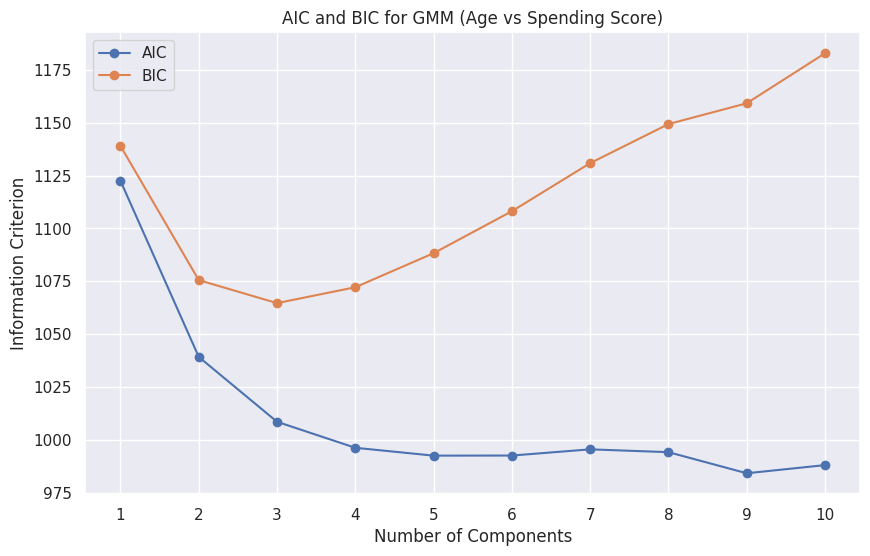


Optimal number of components based on BIC (Age vs Spending Score): 3


In [58]:
# Select the features for GMM (Age vs Spending Score)
X_age_spending = df_encoded[['Age', 'Spending Score (1-100)']]

# Determine the optimal number of components for GMM on Age vs Spending
n_components_range = range(1, 11)
aic_as = []
bic_as = []

print("Computing AIC and BIC for GMM on Age vs Spending Score...")

for n_components in n_components_range:
    gmm_as = GaussianMixture(n_components=n_components, random_state=42, n_init=10)
    gmm_as.fit(X_age_spending)
    aic_as.append(gmm_as.aic(X_age_spending))
    bic_as.append(gmm_as.bic(X_age_spending))

# Plot AIC and BIC results
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_as, marker='o', label='AIC')
plt.plot(n_components_range, bic_as, marker='o', label='BIC')
plt.title('AIC and BIC for GMM (Age vs Spending Score)')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.xticks(n_components_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the number of components that minimizes BIC
optimal_n_components_as = n_components_range[np.argmin(bic_as)]
print(f"\nOptimal number of components based on BIC (Age vs Spending Score): {optimal_n_components_as}")


Applying GMM with 3 components on Age vs Spending Score...


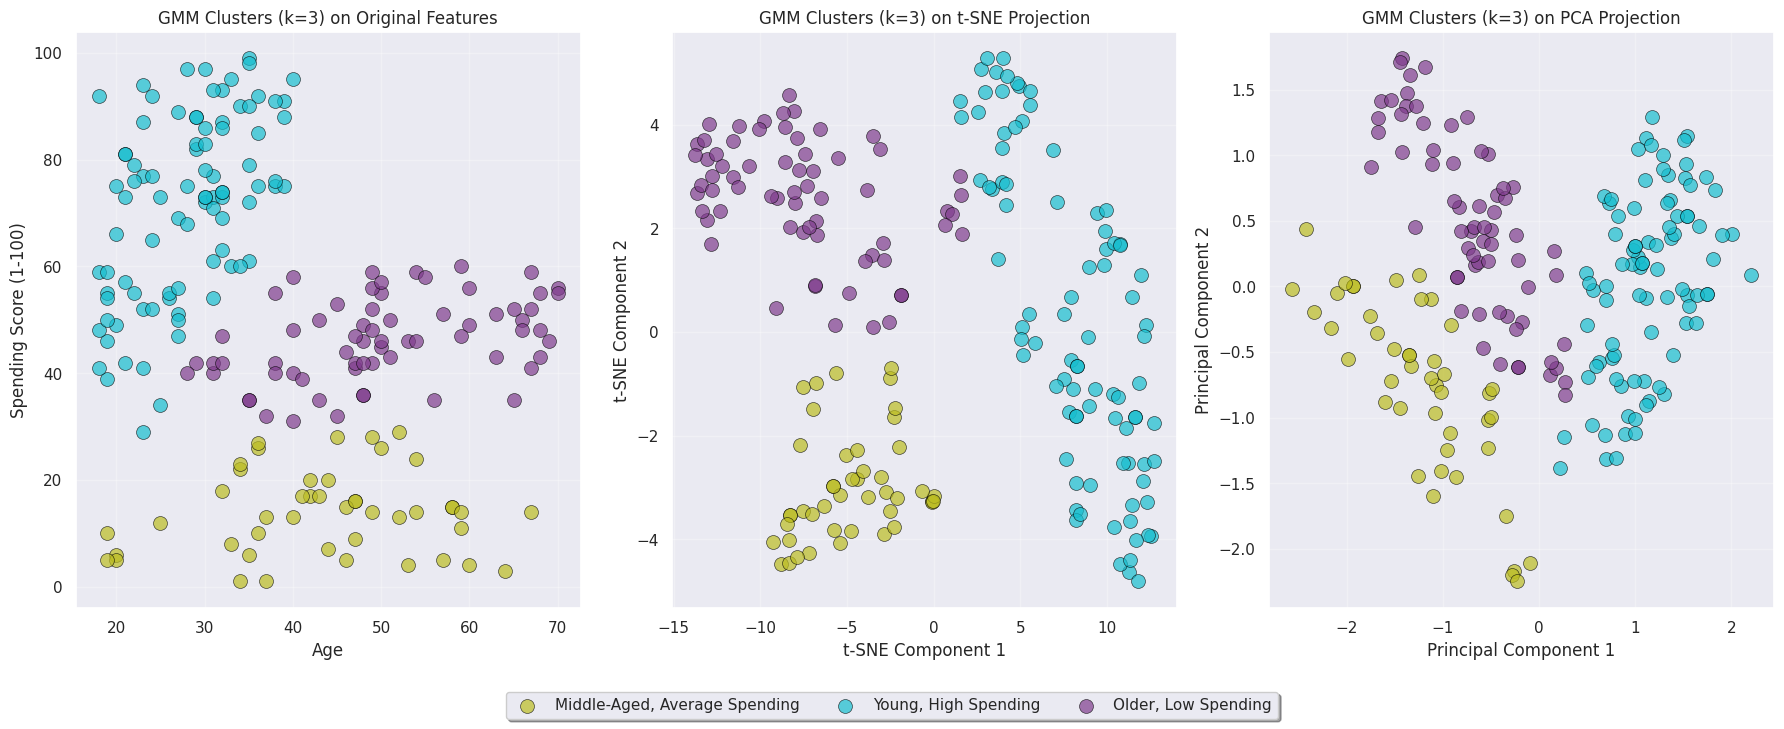

In [59]:
# Based on the characteristics, define descriptive labels for Age vs Spending clusters
cluster_labels_map_as = {
    0: 'Middle-Aged, Average Spending',
    1: 'Young, High Spending',
    2: 'Older, Low Spending'
}

# Apply GMM Clustering with the optimal number of components
print(f"\nApplying GMM with {optimal_n_components_as} components on Age vs Spending Score...")
gmm_as = GaussianMixture(n_components=optimal_n_components_as, random_state=42, n_init=10)
gmm_as.fit(X_age_spending)
gmm_clusters_as = gmm_as.predict(X_age_spending)

# Add the GMM cluster labels to the original dataframe
df['GMM_Age_Spending_Cluster_ID'] = gmm_clusters_as

# Map cluster IDs to descriptive labels
df['GMM_Age_Spending_Cluster_Label'] = df['GMM_Age_Spending_Cluster_ID'].map(cluster_labels_map_as)

# Apply t-SNE and PCA for Visualization (on Age vs Spending features)
tsne_as = TSNE(n_components=2, random_state=42, perplexity=min(30, len(X_age_spending)-1), max_iter=300, learning_rate='auto')
tsne_components_as = tsne_as.fit_transform(X_age_spending)

pca_as = PCA(n_components=2, random_state=42)
pca_components_as = pca_as.fit_transform(X_age_spending)

# Define a custom color palette for the 3 clusters
cluster_colors_as = {
    0: '#bcbd22',  # Cyan/Teal - Middle-Aged, Average Spending
    1: '#17becf',  # Yellow - Young, High Spending
    2: '#7f3c8d'   # Purple - Older, Low Spending
}

# Visualize GMM Clusters
fig = plt.figure(figsize=(18, 7))

# Plot 1: Original Scatter Plot with GMM Clusters
plt.subplot(1, 3, 1)
for cluster_id in sorted(df['GMM_Age_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['GMM_Age_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['Age'],
                cluster_data['Spending Score (1-100)'],
                c=cluster_colors_as[cluster_id],
                s=100,
                label=cluster_labels_map_as[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_as}) on Original Features')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Plot 2: t-SNE Projection with GMM Clusters
plt.subplot(1, 3, 2)
tsne_df_as = pd.DataFrame(data=tsne_components_as, columns=['tsne component 1', 'tsne component 2'])
tsne_df_as['GMM_Age_Spending_Cluster_ID'] = df['GMM_Age_Spending_Cluster_ID'].values

for cluster_id in sorted(tsne_df_as['GMM_Age_Spending_Cluster_ID'].unique()):
    cluster_data = tsne_df_as[tsne_df_as['GMM_Age_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['tsne component 1'],
                cluster_data['tsne component 2'],
                c=cluster_colors_as[cluster_id],
                s=100,
                label=cluster_labels_map_as[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_as}) on t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

# Plot 3: PCA Projection with GMM Clusters
plt.subplot(1, 3, 3)
pca_df_as = pd.DataFrame(data=pca_components_as, columns=['principal component 1', 'principal component 2'])
pca_df_as['GMM_Age_Spending_Cluster_ID'] = df['GMM_Age_Spending_Cluster_ID'].values

for cluster_id in sorted(pca_df_as['GMM_Age_Spending_Cluster_ID'].unique()):
    cluster_data = pca_df_as[pca_df_as['GMM_Age_Spending_Cluster_ID'] == cluster_id]
    plt.scatter(cluster_data['principal component 1'],
                cluster_data['principal component 2'],
                c=cluster_colors_as[cluster_id],
                s=100,
                label=cluster_labels_map_as[cluster_id],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)
plt.title(f'GMM Clusters (k={optimal_n_components_as}) on PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)

# Add a shared legend below all plots
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the legend
plt.show()

- From the plot we can see that in this case the GMM with 3 clusters also doesn't have a strong logical sense for the clusters, as the clusters are not well defined to be able to make a good interpretation based on them.

Display the characteristics of the GMM Clusters.

In [60]:
# Display Characteristics of the GMM Clusters (Age vs Spending)
print(f"\nCluster Characteristics (GMM with k={optimal_n_components_as}, Age vs Spending):")
print(df.groupby('GMM_Age_Spending_Cluster_ID')[['Age', 'Spending Score (1-100)']].mean())


Cluster Characteristics (GMM with k=3, Age vs Spending):
                                   Age  Spending Score (1-100)
GMM_Age_Spending_Cluster_ID                                   
0                            43.466667               13.911111
1                            27.977528               71.449438
2                            50.363636               46.287879


-------------------------------
## 3️⃣ DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
-------------------------------

### DBSCAN all features

In [61]:
from sklearn.cluster import DBSCAN

# Select the features for DBSCAN
X_db = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

# Standardize the features (important for DBSCAN and dimensionality reduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_db)

# Apply DBSCAN on original scaled data
db = DBSCAN(eps=0.8, min_samples=9).fit(X_scaled)
labels = db.labels_

In [62]:
labels

array([-1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  0,  0,  1,  2,  0,  0,
        2,  0,  1,  0,  0,  0,  1,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  2,  1,  0,  0,  2,  0,  0,  1,  2,  0,  0,
        1,  2,  1,  0,  0,  1,  1,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  3,  0,  0,  1,  3, -1,  3,  4,  3,  0,  0, -1,  0,
       -1,  3, -1,  0, -1,  3,  0,  0, -1,  3,  1,  0, -1,  3,  4,  3, -1,
        0, -1,  0,  4,  0, -1,  0,  0,  0, -1,  0,  4,  0,  4,  0, -1,  3,
        4,  3,  4,  3, -1,  0, -1,  3, -1,  3, -1,  0,  4,  0, -1,  3, -1,
       -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1])

In [63]:
# Count clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 5
Number of noise points: 52


Cluster 0: [-0.10964355 -0.11849487  0.28469145  0.        ]
Cluster 1: [ 1.23079873 -0.20108928 -0.09673039  1.        ]
Cluster 2: [-1.16359901 -0.19140234  0.11928807  1.        ]
Cluster 3: [-0.35285289  0.75219222  1.31993306  1.        ]
Cluster 4: [ 0.27091925  0.88514906 -1.41019319  1.        ]

PCA Explained Variance Ratio: [0.33690046 0.26230645]
Total Variance Explained: 59.92%


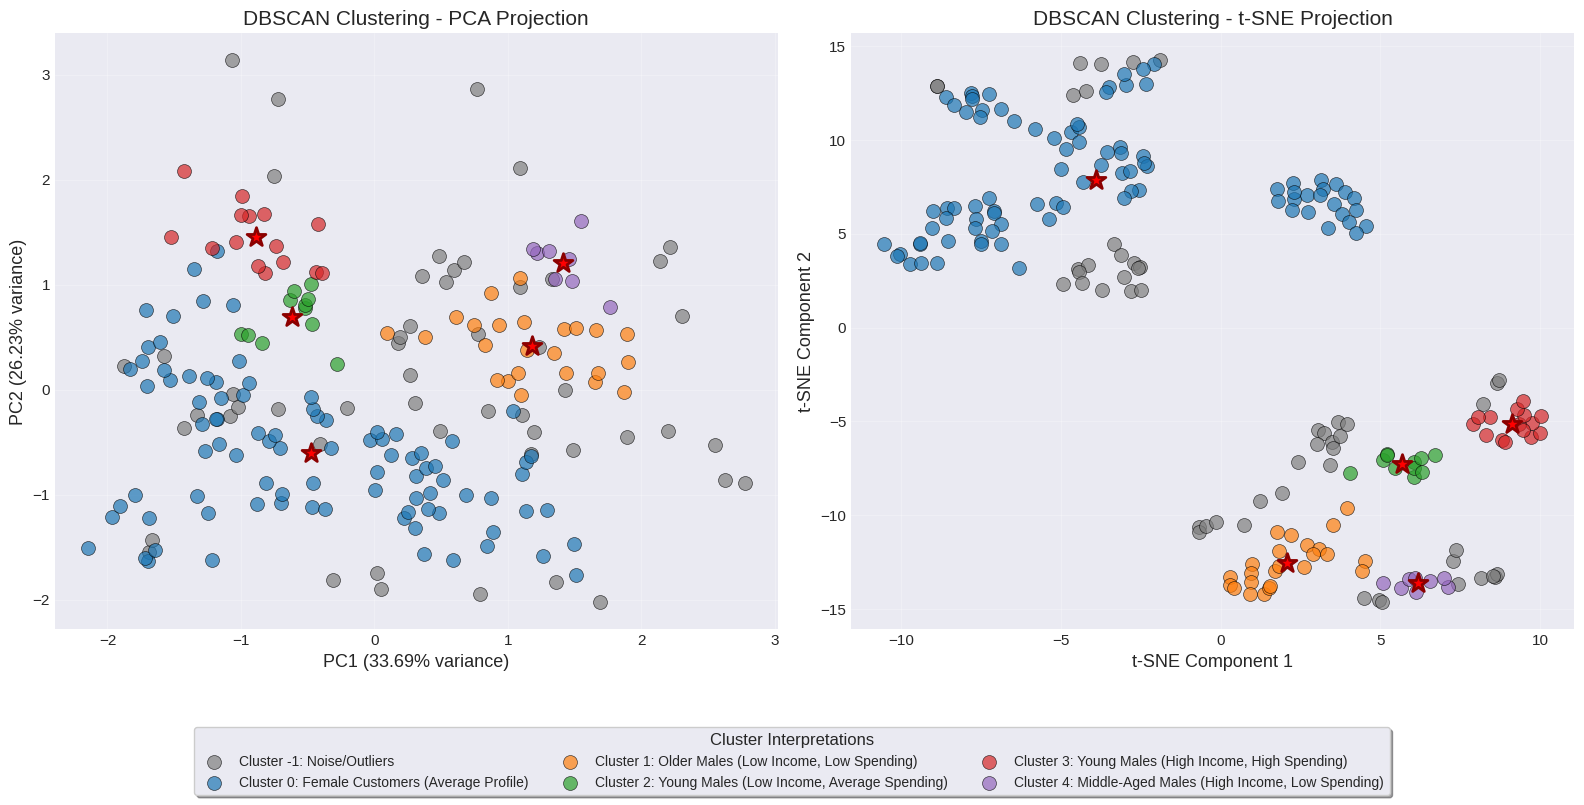

In [64]:
# Define descriptive labels for each cluster based on the analysis
cluster_labels_map_db = {
    0: 'Female Customers (Average Profile)',
    1: 'Older Males (Low Income, Low Spending)',
    2: 'Young Males (Low Income, Average Spending)',
    3: 'Young Males (High Income, High Spending)',
    4: 'Middle-Aged Males (High Income, Low Spending)',
    -1: 'Noise/Outliers'
}

# Define specific colors for each cluster to match tab10 colormap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

tab10_colors = plt.cm.tab10(range(10))
cluster_colors_db = {
    0: tab10_colors[0],   # Blue
    1: tab10_colors[1],   # Orange
    2: tab10_colors[2],   # Green
    3: tab10_colors[3],   # Red
    4: tab10_colors[4],   # Purple
    -1: tab10_colors[7]   # Gray for noise
}

# Calculate centroids for each cluster (excluding noise)
centroids_original = {}
for cluster_id in set(labels):
    if cluster_id != -1:  # Skip noise points
        cluster_points = X_scaled[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        centroids_original[cluster_id] = centroid

# Calculate centroids
for cluster_id in set(labels):
    if cluster_id != -1:
        cluster_points = X_db.values[labels == cluster_id]
        centroid = cluster_points.mean(axis=0)
        print(f"Cluster {cluster_id}: {centroid}")

# PCA Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

# TSNE Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Set the style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 7.5))

# PCA Plot
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    axes[0].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                   c=[cluster_colors_db[cluster_id]],
                   label=f'Cluster {cluster_id}: {cluster_labels_map_db[cluster_id]}',
                   alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=13)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=13)
axes[0].set_title('DBSCAN Clustering - PCA Projection', fontsize=15, fontweight='normal')
axes[0].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# TSNE Plot
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    axes[1].scatter(X_tsne[cluster_mask, 0], X_tsne[cluster_mask, 1],
                   c=[cluster_colors_db[cluster_id]],
                   label=f'Cluster {cluster_id}: {cluster_labels_map_db[cluster_id]}',
                   alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('t-SNE Component 1', fontsize=13)
axes[1].set_ylabel('t-SNE Component 2', fontsize=13)
axes[1].set_title('DBSCAN Clustering - t-SNE Projection', fontsize=15, fontweight='normal')
axes[1].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# Add a shared legend below all plots
handles, labels_legend = axes[1].get_legend_handles_labels()
fig.legend(handles, labels_legend,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.08),
          ncol=3,
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Cluster Interpretations')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the legend
plt.show()

- We can observe from the plot that the DBSCAN algorithm performs pretty well on the dataset with all features as the points are well grouped together.

Print cluster statistics.

In [65]:
print("\nCluster Distribution:")
unique, counts = np.unique(labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    if cluster_id == -1:
        print(f"Noise points: {count}")
    else:
        print(f"Cluster {cluster_id}: {count} points")


Cluster Distribution:
Noise points: 52
Cluster 0: 90 points
Cluster 1: 24 points
Cluster 2: 11 points
Cluster 3: 15 points
Cluster 4: 8 points


In [66]:
# Add cluster labels to the dataframe (use the same dataframe used for clustering)
df_clustered = df_encoded.copy()
df_clustered['DBSCAN_Cluster'] = labels

# Get unique clusters (excluding noise if present)
unique_clusters = sorted([c for c in set(labels) if c != -1])
noise_count = sum(labels == -1)

# Summary comparison table
print(f"\nNumber of clusters found: {len(unique_clusters)}")
print(f"Number of noise points: {noise_count}")
print(f"Total data points: {len(labels)}")
print("\n")

summary_data = []
for cluster_id in unique_clusters:
    cluster_mask = labels == cluster_id
    cluster_data = df_clustered[cluster_mask]
    summary_data.append({
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Size %': f"{len(cluster_data)/len(df_clustered)*100:.2f}%",
        'Avg Age': f"{cluster_data['Age'].mean():.1f}",
        'Avg Income': f"{cluster_data['Annual Income (k$)'].mean():.1f}",
        'Avg Spending': f"{cluster_data['Spending Score (1-100)'].mean():.1f}",
        'Male %': f"{(cluster_data['Genre_Male'].sum()/len(cluster_data))*100:.1f}%"
    })

if noise_count > 0:
    noise_data = df_clustered[labels == -1]
    summary_data.append({
        'Cluster': 'Noise',
        'Size': noise_count,
        'Size %': f"{noise_count/len(df_clustered)*100:.2f}%",
        'Avg Age': f"{noise_data['Age'].mean():.1f}",
        'Avg Income': f"{noise_data['Annual Income (k$)'].mean():.1f}",
        'Avg Spending': f"{noise_data['Spending Score (1-100)'].mean():.1f}",
        'Male %': f"{(noise_data['Genre_Male'].sum()/noise_count)*100:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


Number of clusters found: 5
Number of noise points: 52
Total data points: 200


Cluster  Size Size % Avg Age Avg Income Avg Spending Male %
      0    90 45.00%    -0.1       -0.1          0.3   0.0%
      1    24 12.00%     1.2       -0.2         -0.1 100.0%
      2    11  5.50%    -1.2       -0.2          0.1 100.0%
      3    15  7.50%    -0.4        0.8          1.3 100.0%
      4     8  4.00%     0.3        0.9         -1.4 100.0%
  Noise    52 26.00%    -0.1       -0.0         -0.6  57.7%


- Based on these statistics we created the legend in the plot.

### DBSCAN Annual Income vs Spending Score

In [67]:
# Select the features for DBSCAN
X_db = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_db)

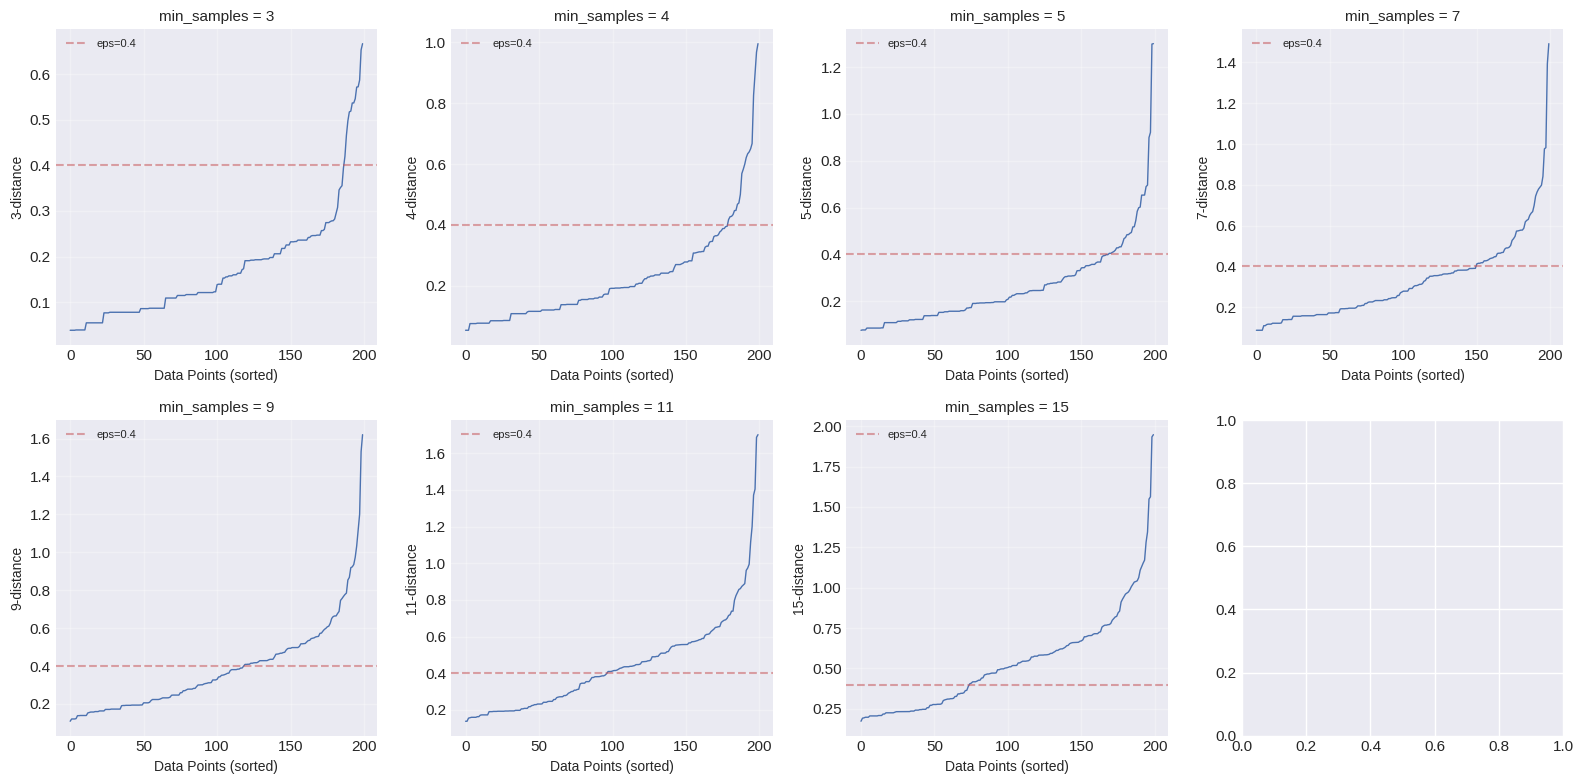

In [68]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Try different min_samples values
min_samples_candidates = [3, 4, 5, 7, 9, 11, 15]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, k in enumerate(min_samples_candidates):
    # Calculate k-nearest neighbors distances
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X_scaled)
    distances, indices = neighbors.kneighbors(X_scaled)

    # Sort distances to k-th nearest neighbor
    k_distances = np.sort(distances[:, k-1], axis=0)

    # Plot k-distance graph
    axes[idx].plot(k_distances, linewidth=1)
    axes[idx].set_xlabel('Data Points (sorted)', fontsize=10)
    axes[idx].set_ylabel(f'{k}-distance', fontsize=10)
    axes[idx].set_title(f'min_samples = {k}', fontsize=11)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0.4, color='r', linestyle='--', alpha=0.5, label='eps=0.4')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

K-distance Graphs interpretation:
- We Look for the 'elbow' or 'knee' point where distance sharply increases, where the k value (min_samples) that shows clearest elbow is often best -> k = 5 or k = 7
- The y-value at the elbow suggests a good eps value (red line) -> around 0.4


Use `OPTICS` to determine the best *eps* value, by trying with `min_samples` from the set {5, 7}.

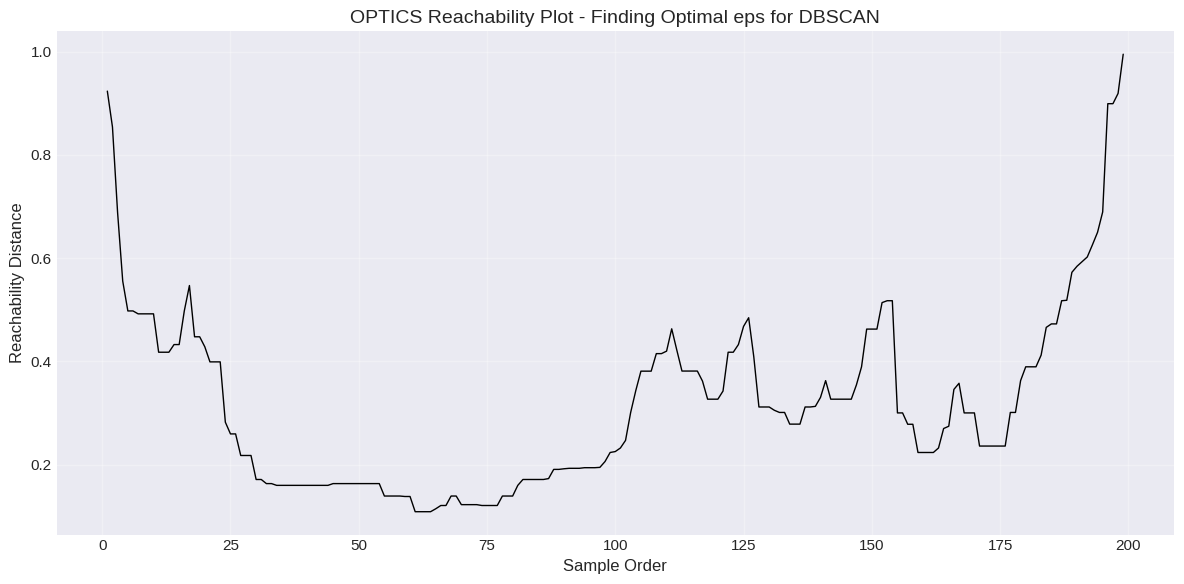


Suggested eps values based on OPTICS reachability:
Mean reachability: 0.3165
Median reachability: 0.3002
75th percentile: 0.4164
90th percentile: 0.5146

Comparing different eps values:
eps=0.3002: 6 clusters, 35 noise points
eps=0.4164: 3 clusters, 14 noise points
eps=0.4000: 4 clusters, 15 noise points
eps=0.5000: 2 clusters, 8 noise points
eps=0.6000: 1 clusters, 5 noise points

Final DBSCAN with eps=0.4:
Number of clusters: 4
Number of noise points: 15


In [69]:
from sklearn.cluster import OPTICS
import numpy as np

# Select the features for clustering
X_db = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_db)

# Apply OPTICS to analyze reachability distances
optics = OPTICS(min_samples=9, metric='euclidean')
optics.fit(X_scaled)

# Get reachability distances
reachability = optics.reachability_[optics.ordering_]

# Plot reachability distance to visualize potential eps values
plt.figure(figsize=(12, 6))
plt.plot(reachability, color='black', linewidth=1)
plt.ylabel('Reachability Distance', fontsize=12)
plt.xlabel('Sample Order', fontsize=12)
plt.title('OPTICS Reachability Plot - Finding Optimal eps for DBSCAN', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate statistics to suggest eps values
valid_reachability = reachability[np.isfinite(reachability)]
print("\nSuggested eps values based on OPTICS reachability:")
print(f"Mean reachability: {np.mean(valid_reachability):.4f}")
print(f"Median reachability: {np.median(valid_reachability):.4f}")
print(f"75th percentile: {np.percentile(valid_reachability, 75):.4f}")
print(f"90th percentile: {np.percentile(valid_reachability, 90):.4f}")

# Try different eps values and compare results
eps_candidates = [
    np.median(valid_reachability),
    np.percentile(valid_reachability, 75),
    0.4,
    0.5,
    0.6
]

print("\nComparing different eps values:")
for eps_val in eps_candidates:
    db_temp = DBSCAN(eps=eps_val, min_samples=5).fit(X_scaled)
    n_clusters_temp = len(set(db_temp.labels_)) - (1 if -1 in db_temp.labels_ else 0)
    n_noise_temp = list(db_temp.labels_).count(-1)
    print(f"eps={eps_val:.4f}: {n_clusters_temp} clusters, {n_noise_temp} noise points")

# Use the best eps value
best_eps = 0.4
db = DBSCAN(eps=best_eps, min_samples=5).fit(X_scaled)
labels = db.labels_

# Count clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"\nFinal DBSCAN with eps={best_eps}:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

- The *eps* value that we will use is 0.4, with 5 *min_samples*.

In [70]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN on original scaled data
db = DBSCAN(eps=0.4, min_samples=5).fit(X_scaled)
labels = db.labels_

In [71]:
labels

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [72]:
# Count clusters (excluding noise points labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 4
Number of noise points: 15



Cluster Analysis:
Cluster 0: Size=115, Avg Income=-0.5, Avg Spending=0.1
Cluster 1: Size=11, Avg Income=-1.4, Avg Spending=-1.6
Cluster 2: Size=32, Avg Income=0.8, Avg Spending=1.3
Cluster 3: Size=27, Avg Income=0.9, Avg Spending=-1.4


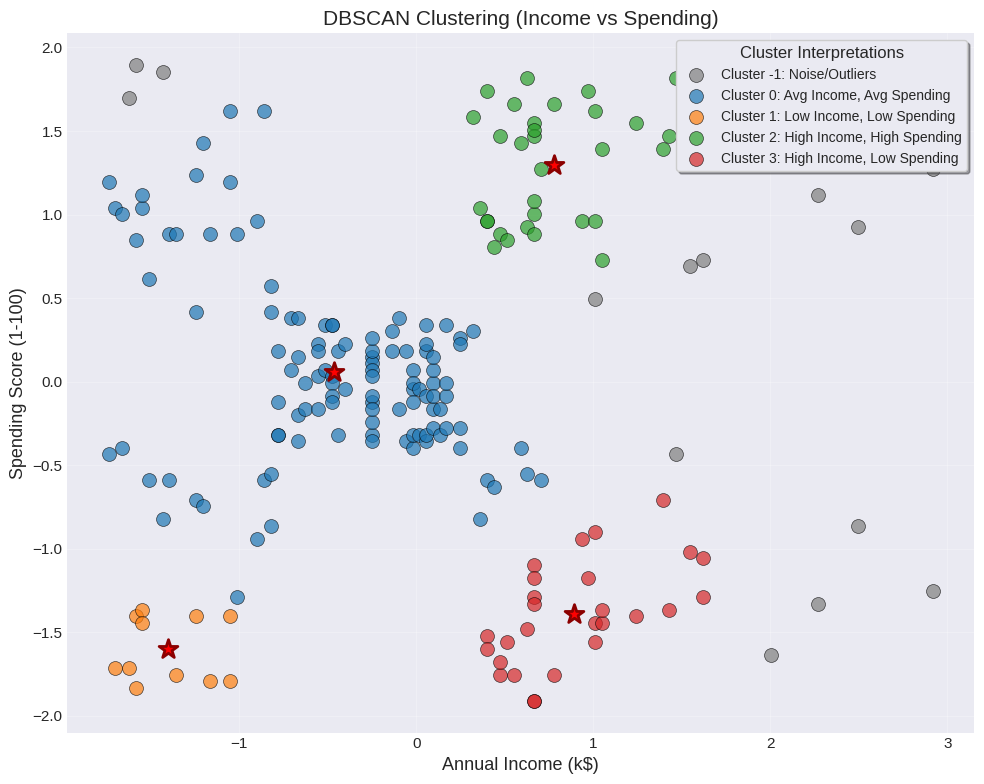

In [73]:
# Analyze clusters to create meaningful labels
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    if cluster_id != -1:
        cluster_mask = labels == cluster_id
        cluster_data = df_encoded[cluster_mask]
        avg_income = cluster_data['Annual Income (k$)'].mean()
        avg_spending = cluster_data['Spending Score (1-100)'].mean()
        size = cluster_data.shape[0]
        print(f"Cluster {cluster_id}: Size={size}, Avg Income={avg_income:.1f}, Avg Spending={avg_spending:.1f}")

# Define descriptive labels for each cluster based on Income vs Spending patterns
cluster_labels_map_is = {
    0: 'Avg Income, Avg Spending',
    1: 'Low Income, Low Spending',
    2: 'High Income, High Spending',
    3: 'High Income, Low Spending',
    -1: 'Noise/Outliers'
}

# Define specific colors for each cluster
tab10_colors = plt.cm.tab10(range(10))
cluster_colors_is = {
    0: tab10_colors[0],   # Blue
    1: tab10_colors[1],   # Orange
    2: tab10_colors[2],   # Green
    3: tab10_colors[3],   # Red
    -1: tab10_colors[7]   # Gray for noise
}

# Set the style
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter Plot using original data values
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    ax.scatter(df_encoded[cluster_mask]['Annual Income (k$)'],
               df_encoded[cluster_mask]['Spending Score (1-100)'],
               c=[cluster_colors_is[cluster_id]],
               label=f'Cluster {cluster_id}: {cluster_labels_map_is[cluster_id]}',
               alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Annual Income (k$)', fontsize=13)
ax.set_ylabel('Spending Score (1-100)', fontsize=13)
ax.set_title('DBSCAN Clustering (Income vs Spending)', fontsize=15, fontweight='normal')
ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# Add legend in upper right corner
ax.legend(loc='upper right',
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Cluster Interpretations')

plt.tight_layout()
plt.show()

- We can see from the plot that comparing the DBSCAN on Annual Income vs Spending Score to GMM and KMeans that the clusters are not defined in the best way. The ideal number of clusters would be 5, but even with the best *eps* and *min_samples* we could not get that number of clusters and there is some noise.

--------------------------------------------
## 4️⃣ Mean Shift Clustering
--------------------------------------------

### Mean Shift Clustering all features

#### Smaller bandwidth

In [74]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.08)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(1.156303116474772), bin_seeding=True)

In [75]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

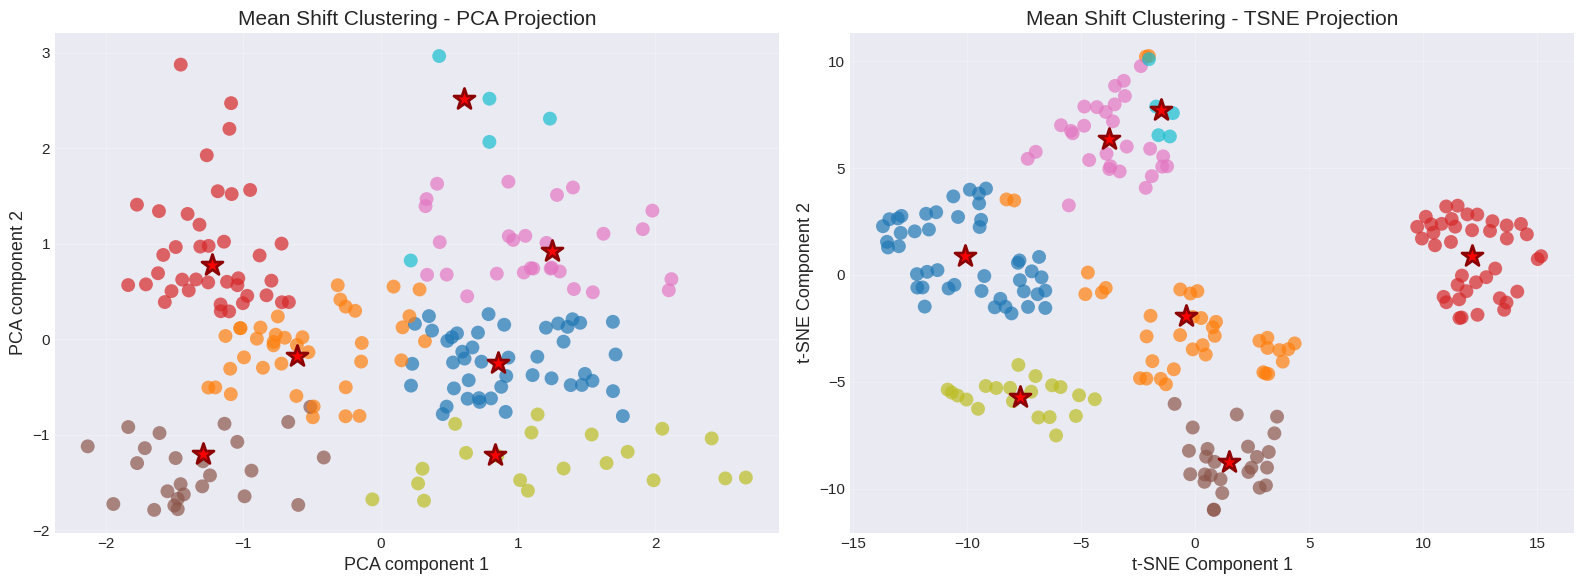

In [76]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is NumPy arrays
X_msc_np = np.array(X_msc)
cluster_centers_np = np.array(cluster_centers)

# PCA Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_msc_np)

# Project centroids into PCA space
centroids_pca = pca.transform(cluster_centers_np)

# TSNE Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_msc)

# Approximate centroids in t-SNE space by averaging the 2D positions of each cluster
centroids_tsne = np.array([
    X_tsne[labels == i].mean(axis=0) for i in np.unique(labels)
])

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- PCA Plot ---
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10',
                alpha=0.7, s=100, edgecolors='none')

axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                c='red', marker='*', s=250, edgecolors='darkred', linewidths=2, zorder=10)

axes[0].set_xlabel('PCA component 1', fontsize=13)
axes[0].set_ylabel('PCA component 2', fontsize=13)
axes[0].set_title('Mean Shift Clustering - PCA Projection', fontsize=15)
axes[0].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# --- TSNE Plot ---
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10',
                alpha=0.7, s=100, edgecolors='none')

axes[1].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1],
                c='red', marker='*', s=250, edgecolors='darkred', linewidths=2, zorder=10)

axes[1].set_xlabel('t-SNE Component 1', fontsize=13)
axes[1].set_ylabel('t-SNE Component 2', fontsize=13)
axes[1].set_title('Mean Shift Clustering - TSNE Projection', fontsize=15)
axes[1].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


- The clusters are pretty well defined, with some exceptions

#### Larger bandwidth

In [77]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.12)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(1.3557981787147415), bin_seeding=True)

In [78]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

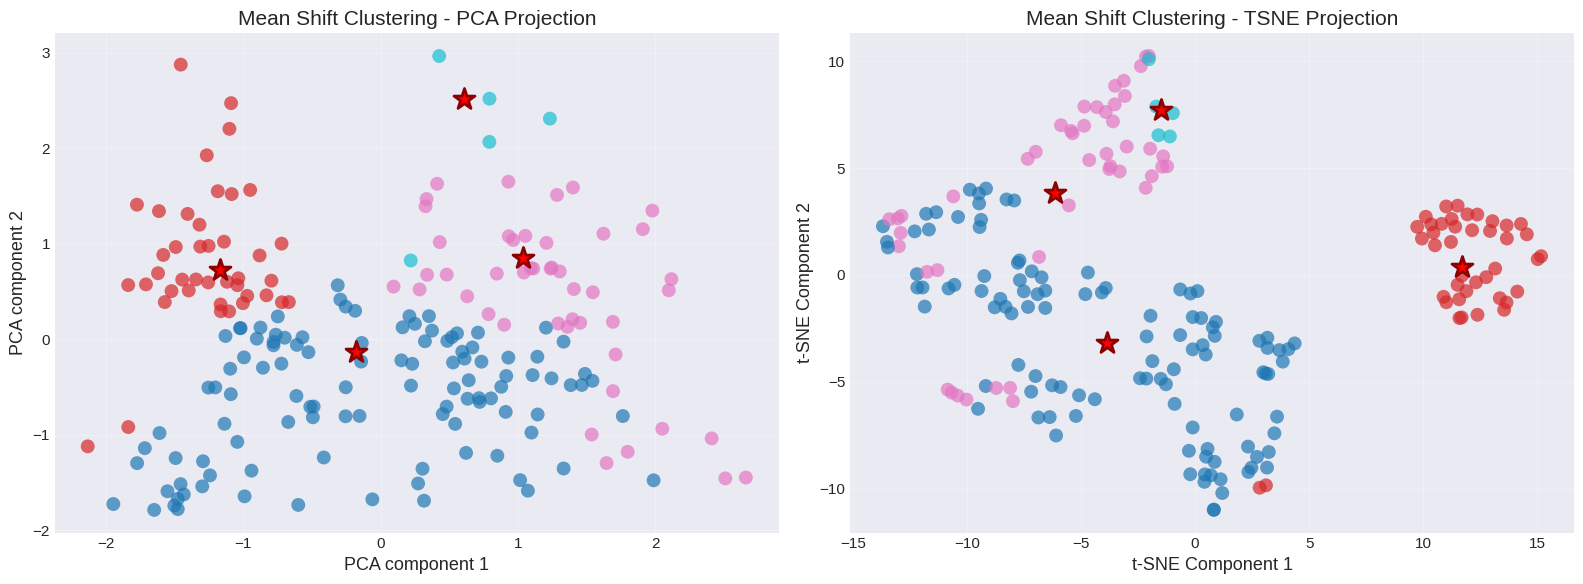

In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is NumPy arrays
X_msc_np = np.array(X_msc)
cluster_centers_np = np.array(cluster_centers)

# PCA Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_msc_np)

# Project centroids into PCA space
centroids_pca = pca.transform(cluster_centers_np)

# TSNE Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_msc)

# Approximate centroids in t-SNE space by averaging the 2D positions of each cluster
centroids_tsne = np.array([
    X_tsne[labels == i].mean(axis=0) for i in np.unique(labels)
])

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- PCA Plot ---
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10',
                alpha=0.7, s=100, edgecolors='none')

axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                c='red', marker='*', s=250, edgecolors='darkred', linewidths=2, zorder=10)

axes[0].set_xlabel('PCA component 1', fontsize=13)
axes[0].set_ylabel('PCA component 2', fontsize=13)
axes[0].set_title('Mean Shift Clustering - PCA Projection', fontsize=15)
axes[0].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

# --- TSNE Plot ---
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10',
                alpha=0.7, s=100, edgecolors='none')

axes[1].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1],
                c='red', marker='*', s=250, edgecolors='darkred', linewidths=2, zorder=10)

axes[1].set_xlabel('t-SNE Component 1', fontsize=13)
axes[1].set_ylabel('t-SNE Component 2', fontsize=13)
axes[1].set_title('Mean Shift Clustering - TSNE Projection', fontsize=15)
axes[1].grid(True, alpha=0.4, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


**Conclusion:** A smaller bandwidth gives better clusters than a larger bandwidth, where the clusters are mixed with one another.

### Mean Shift Clustering Annual Income vs Spending Score

#### Smaller bandwidth

In [80]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.12)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.7431252256147565), bin_seeding=True)

In [81]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 7
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Cluster Analysis:
Cluster 0: Size=80, Avg Income=-0.2, Avg Spending=-0.0
Cluster 1: Size=32, Avg Income=0.8, Avg Spending=1.3
Cluster 2: Size=30, Avg Income=0.8, Avg Spending=-1.3
Cluster 3: Size=22, Avg Income=-1.3, Avg Spending=1.1
Cluster 4: Size=23, Avg Income=-1.3, Avg Spending=-1.1
Cluster 5: Size=7, Avg Income=2.1, Avg Spending=1.1
Cluster 6: Size=6, Avg Income=2.2, Avg Spending=-1.2


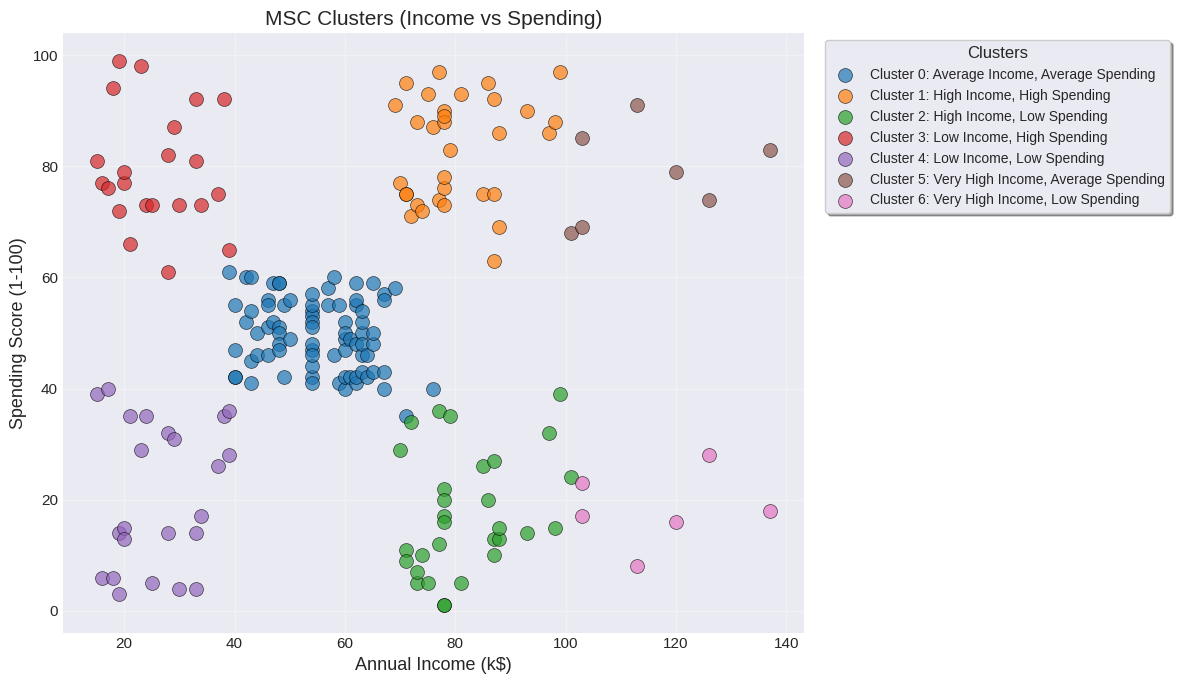

In [82]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Income={avg_income:.1f}, Avg Spending={avg_spending:.1f}")

# Manually define cluster labels based on the analysis above
cluster_labels_map = {
    0: 'Average Income, Average Spending',
    1: 'High Income, High Spending',
    2: 'High Income, Low Spending',
    3: 'Low Income, High Spending',
    4: 'Low Income, Low Spending',
    5: 'Very High Income, Average Spending',
    6: 'Very High Income, Low Spending'
}

# Add the MSC cluster labels to the original dataframe
df['MSC_Income_Spending_Cluster_ID'] = labels
df['MSC_Income_Spending_Cluster_Label'] = df['MSC_Income_Spending_Cluster_ID'].map(cluster_labels_map)

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Income_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Income_Spending_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}: {cluster_labels_map[cluster_id]}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

# Convert cluster_centers to numpy array and inverse transform to original scale
cluster_centers_np = np.array(cluster_centers)
centroids_original = scaler.inverse_transform(cluster_centers_np)

ax.set_title('MSC Clusters (Income vs Spending)', fontsize=15, fontweight='normal')
ax.set_xlabel('Annual Income (k$)', fontsize=13)
ax.set_ylabel('Spending Score (1-100)', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

- We can see from the plot that the clusters are very well defined, but on a smaller bandwidth there are more clusters.

#### Larger bandwidth

In [83]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Annual Income (k$)', 'Spending Score (1-100)']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.18)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.9721439798481865), bin_seeding=True)

In [84]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 5
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Cluster Analysis:
Cluster 0: Size=77, Avg Income=-0.2, Avg Spending=-0.0
Cluster 1: Size=39, Avg Income=1.0, Avg Spending=1.2
Cluster 2: Size=38, Avg Income=1.0, Avg Spending=-1.2
Cluster 3: Size=23, Avg Income=-1.3, Avg Spending=-1.1
Cluster 4: Size=23, Avg Income=-1.3, Avg Spending=1.1


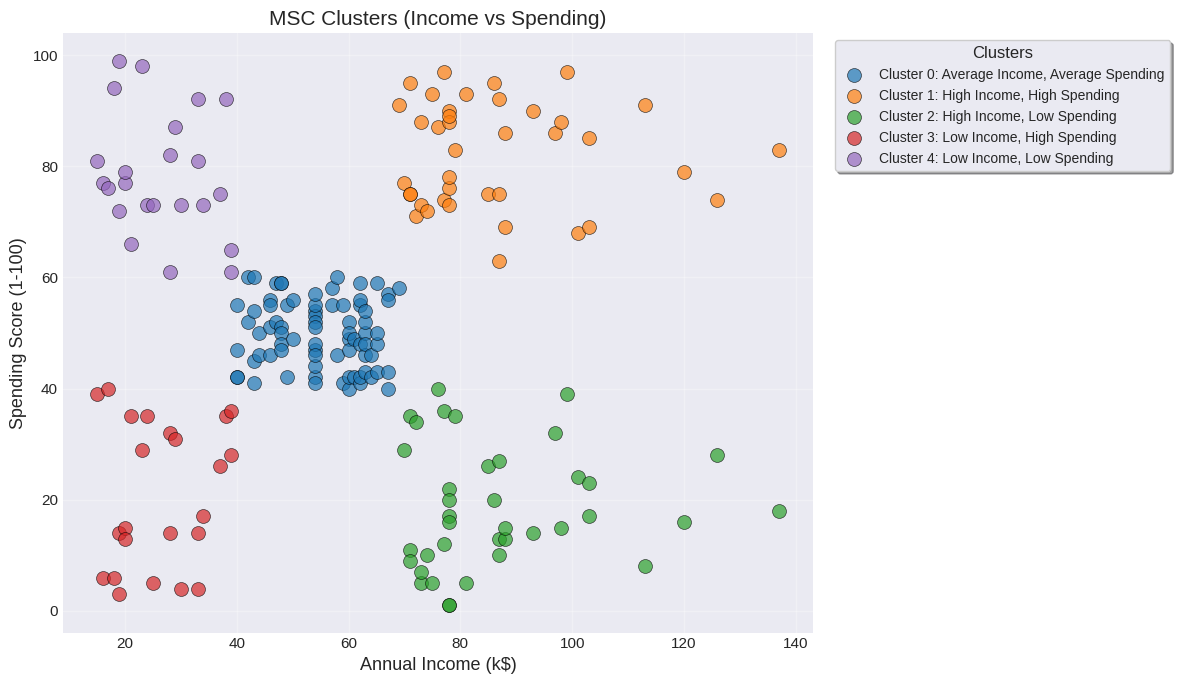

In [85]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Income={avg_income:.1f}, Avg Spending={avg_spending:.1f}")

# Manually define cluster labels based on the analysis above
cluster_labels_map = {
    0: 'Average Income, Average Spending',
    1: 'High Income, High Spending',
    2: 'High Income, Low Spending',
    3: 'Low Income, High Spending',
    4: 'Low Income, Low Spending'
}

# Add the MSC cluster labels to the original dataframe
df['MSC_Income_Spending_Cluster_ID'] = labels
df['MSC_Income_Spending_Cluster_Label'] = df['MSC_Income_Spending_Cluster_ID'].map(cluster_labels_map)

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Income_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Income_Spending_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}: {cluster_labels_map[cluster_id]}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

# Convert cluster_centers to numpy array and inverse transform to original scale
cluster_centers_np = np.array(cluster_centers)
centroids_original = scaler.inverse_transform(cluster_centers_np)

ax.set_title('MSC Clusters (Income vs Spending)', fontsize=15, fontweight='normal')
ax.set_xlabel('Annual Income (k$)', fontsize=13)
ax.set_ylabel('Spending Score (1-100)', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

- The plot with a larger bancwidth shows very well defined clusters, the same as KMeans and GMM on these features: 'Annual Income' and 'Spending Score'.

### Mean Shift Clustering Annual Income vs Age


#### Smaller bandwidth

In [86]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Annual Income (k$)', 'Age']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.6768745060546221), bin_seeding=True)

In [87]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 9
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

Cluster Analysis:
Cluster 0: Size=41, Avg Income=0.8, Avg Age=-0.4
Cluster 1: Size=31, Avg Income=0.3, Avg Age=0.6
Cluster 2: Size=33, Avg Income=-1.3, Avg Age=-0.9
Cluster 3: Size=26, Avg Income=0.0, Avg Age=-1.2
Cluster 4: Size=20, Avg Income=-0.2, Avg Age=1.8
Cluster 5: Size=18, Avg Income=-0.6, Avg Age=0.1
Cluster 6: Size=15, Avg Income=-1.1, Avg Age=1.2
Cluster 7: Size=10, Avg Income=2.1, Avg Age=-0.4
Cluster 8: Size=6, Avg Income=1.8, Avg Age=0.7


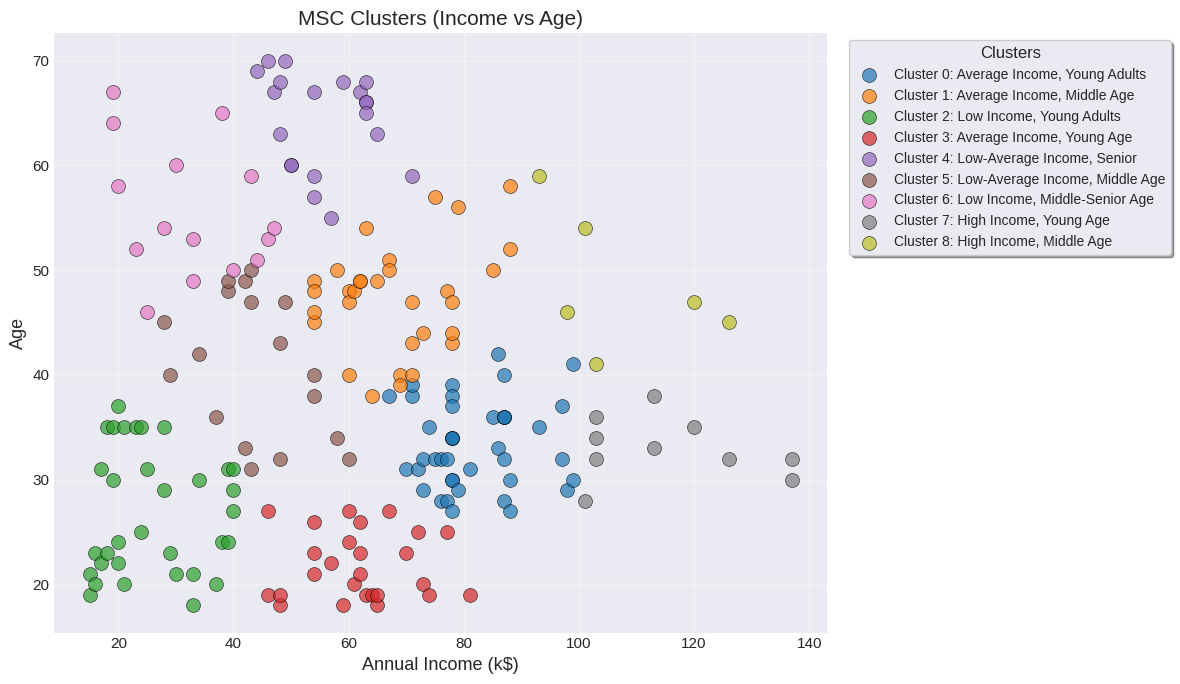

In [88]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_age = cluster_data['Age'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Income={avg_income:.1f}, Avg Age={avg_age:.1f}")

# Manually define cluster labels based on income and age patterns
cluster_labels_map = {
    0: 'Average Income, Young Adults',
    1: 'Average Income, Middle Age',
    2: 'Low Income, Young Adults',
    3: 'Average Income, Young Age',
    4: 'Low-Average Income, Senior',
    5: 'Low-Average Income, Middle Age',
    6: 'Low Income, Middle-Senior Age',
    7: 'High Income, Young Age',
    8: 'High Income, Middle Age'
}

# Add the MSC cluster labels to the original dataframe
df['MSC_Income_Age_Cluster_ID'] = labels
df['MSC_Income_Age_Cluster_Label'] = df['MSC_Income_Age_Cluster_ID'].map(cluster_labels_map)

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Income_Age_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Income_Age_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Age'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}: {cluster_labels_map[cluster_id]}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

ax.set_title('MSC Clusters (Income vs Age)', fontsize=15, fontweight='normal')
ax.set_xlabel('Annual Income (k$)', fontsize=13)
ax.set_ylabel('Age', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

- The plots shows some well defined clusters that make logical sense, which, in this case, make better logical sense thant the ones given by KMeans and GMM.

#### Larger bandwidth

In [113]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Annual Income (k$)', 'Age']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.16)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.8846742423231373), bin_seeding=True)

In [114]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 6
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Cluster Analysis:
Cluster 0: Size=67, Avg Income=1.0, Avg Age=-0.3
Cluster 1: Size=33, Avg Income=0.1, Avg Age=0.7
Cluster 2: Size=26, Avg Income=-0.1, Avg Age=-1.2
Cluster 3: Size=29, Avg Income=-1.3, Avg Age=-0.9
Cluster 4: Size=15, Avg Income=-1.1, Avg Age=0.4
Cluster 5: Size=30, Avg Income=-0.3, Avg Age=1.7


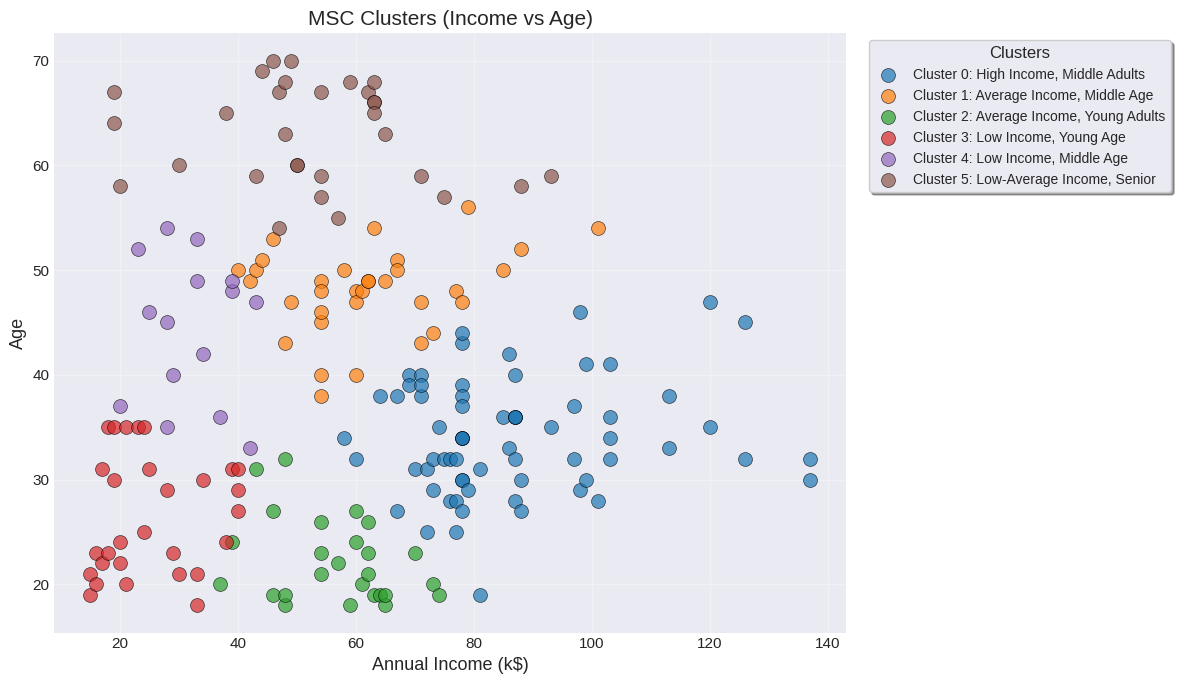

In [91]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_age = cluster_data['Age'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Income={avg_income:.1f}, Avg Age={avg_age:.1f}")

# Manually define cluster labels based on income and age patterns
cluster_labels_map = {
    0: 'Average Income, Young Adults',
    1: 'Average Income, Middle Age',
    2: 'Low Income, Young Adults',
    3: 'Average Income, Young Age',
    4: 'Low-Average Income, Senior',
    5: 'Low-Average Income, Middle Age',
    6: 'Low Income, Middle-Senior Age',
    7: 'High Income, Young Age',
    8: 'High Income, Middle Age'
}

# Add the MSC cluster labels to the original dataframe
df['MSC_Income_Age_Cluster_ID'] = labels
df['MSC_Income_Age_Cluster_Label'] = df['MSC_Income_Age_Cluster_ID'].map(cluster_labels_map)

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Income_Age_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Income_Age_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Annual Income (k$)'],
               cluster_data['Age'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}: {cluster_labels_map[cluster_id]}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

ax.set_title('MSC Clusters (Income vs Age)', fontsize=15, fontweight='normal')
ax.set_xlabel('Annual Income (k$)', fontsize=13)
ax.set_ylabel('Age', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

- We see from the plot with a larger bandwidth that there are less clusters, but still very well defined.

### Mean Shift Clustering Age vs Spending Score

#### Smaller bandwidth

In [118]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Age', 'Spending Score (1-100)']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.09)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.5857409433949541), bin_seeding=True)

In [119]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 9
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

Cluster Analysis:
Cluster 0: Size=56, Avg Age=-0.6, Avg Spending=1.3
Cluster 1: Size=28, Avg Age=0.7, Avg Spending=-0.1
Cluster 2: Size=28, Avg Age=-1.2, Avg Spending=0.0
Cluster 3: Size=14, Avg Age=0.6, Avg Spending=-1.2
Cluster 4: Size=21, Avg Age=-0.3, Avg Spending=-0.1
Cluster 5: Size=20, Avg Age=1.9, Avg Spending=-0.0
Cluster 6: Size=16, Avg Age=-0.1, Avg Spending=-1.3
Cluster 7: Size=12, Avg Age=1.4, Avg Spending=-1.5
Cluster 8: Size=5, Avg Age=-1.3, Avg Spending=-1.7


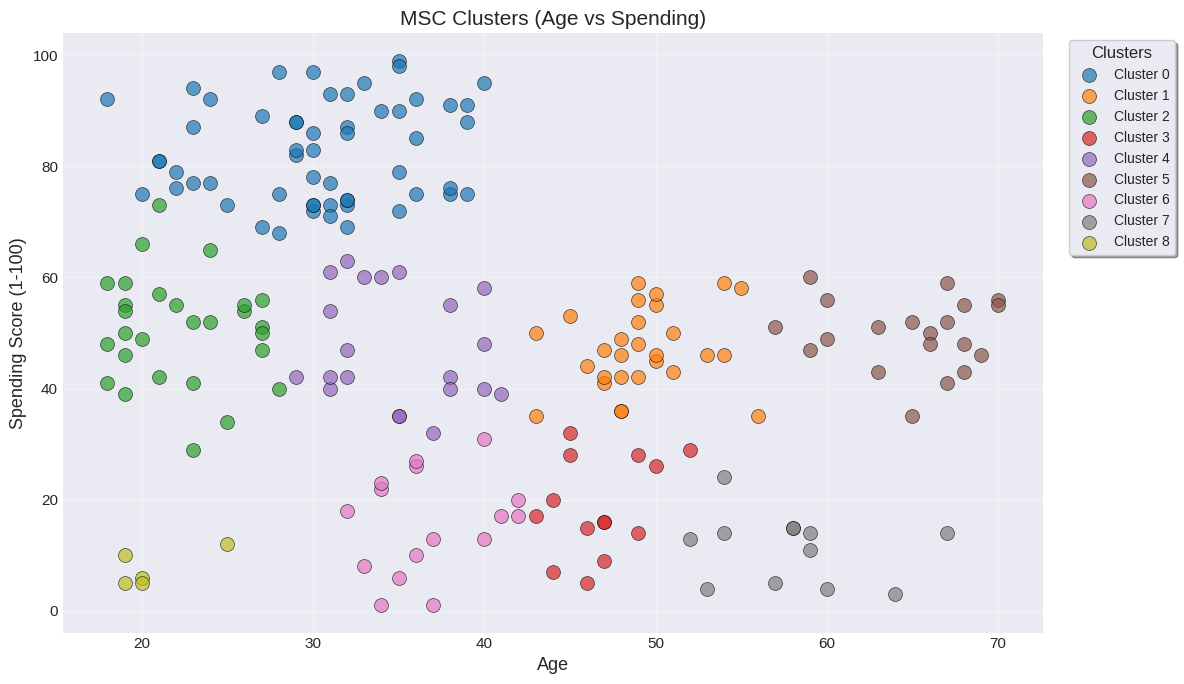

In [120]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Age'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Age={avg_income:.1f}, Avg Spending={avg_spending:.1f}")

# Add the MSC cluster labels to the original dataframe
df['MSC_Age_Spending_Cluster_ID'] = labels

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Age_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Age_Spending_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Age'],
               cluster_data['Spending Score (1-100)'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

ax.set_title('MSC Clusters (Age vs Spending)', fontsize=15, fontweight='normal')
ax.set_xlabel('Age', fontsize=13)
ax.set_ylabel('Spending Score (1-100)', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

#### Larger bandwidth

In [127]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X_msc = df_encoded[['Age', 'Spending Score (1-100)']]

bandwidth = estimate_bandwidth(X_msc, quantile=0.14)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_msc)

MeanShift(bandwidth=np.float64(0.7819554319207919), bin_seeding=True)

In [128]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

Number of clusters found: 6
Cluster IDs: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Cluster Analysis:
Cluster 0: Size=57, Avg Age=-0.6, Avg Spending=1.2
Cluster 1: Size=37, Avg Age=0.6, Avg Spending=-0.2
Cluster 2: Size=37, Avg Age=-1.0, Avg Spending=0.0
Cluster 3: Size=40, Avg Age=0.4, Avg Spending=-1.3
Cluster 4: Size=23, Avg Age=1.8, Avg Spending=-0.0
Cluster 5: Size=6, Avg Age=-1.3, Avg Spending=-1.5


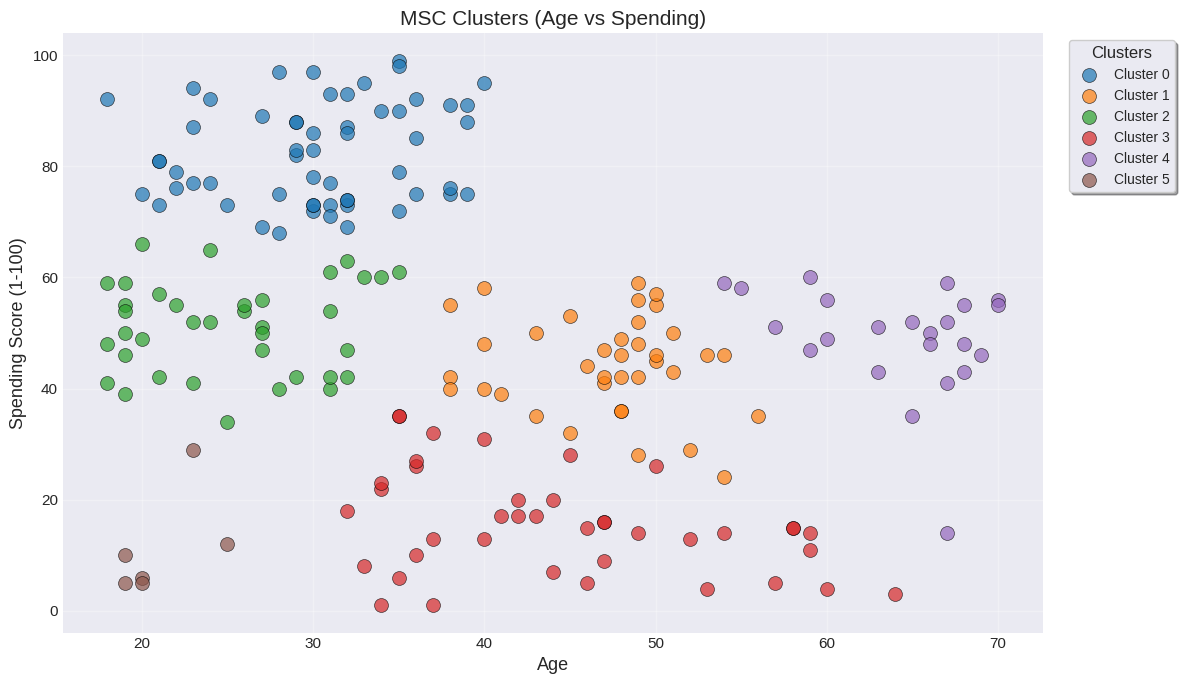

In [129]:
# Check how many clusters were found
n_clusters = len(set(labels))
print(f"Number of clusters found: {n_clusters}")
print(f"Cluster IDs: {sorted(set(labels))}")

# Analyze each cluster to understand their characteristics
print("\nCluster Analysis:")
for cluster_id in sorted(set(labels)):
    cluster_mask = labels == cluster_id
    cluster_data = df_encoded[cluster_mask]
    avg_income = cluster_data['Age'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    size = cluster_data.shape[0]
    print(f"Cluster {cluster_id}: Size={size}, Avg Age={avg_income:.1f}, Avg Spending={avg_spending:.1f}")

# Add the MSC cluster labels to the original dataframe
df['MSC_Age_Spending_Cluster_ID'] = labels

# Define colors dynamically using a colormap
tab10_colors = plt.cm.tab10(range(10))
cluster_colors = {i: tab10_colors[i] for i in range(n_clusters)}

# Visualize MSC Clusters
fig, ax = plt.subplots(figsize=(12, 7))

# Plot scatter with MSC Clusters
for cluster_id in sorted(df['MSC_Age_Spending_Cluster_ID'].unique()):
    cluster_data = df[df['MSC_Age_Spending_Cluster_ID'] == cluster_id]
    ax.scatter(cluster_data['Age'],
               cluster_data['Spending Score (1-100)'],
               c=[cluster_colors[cluster_id]],
               s=100,
               label=f'Cluster {cluster_id}',
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

ax.set_title('MSC Clusters (Age vs Spending)', fontsize=15, fontweight='normal')
ax.set_xlabel('Age', fontsize=13)
ax.set_ylabel('Spending Score (1-100)', fontsize=13)
ax.grid(True, alpha=0.3)

# Add legend to upper right, outside the plot area
ax.legend(loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10,
          title='Clusters')

plt.tight_layout()
plt.show()

----------------------------------------
## 5️⃣ Agglomerative Clustering
----------------------------------------

### Agglomeratice Clustering all features

#### PCA dimensionally reduced data

In [98]:
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab20')

/tmp/ipython-input-3756433481.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('tab20')


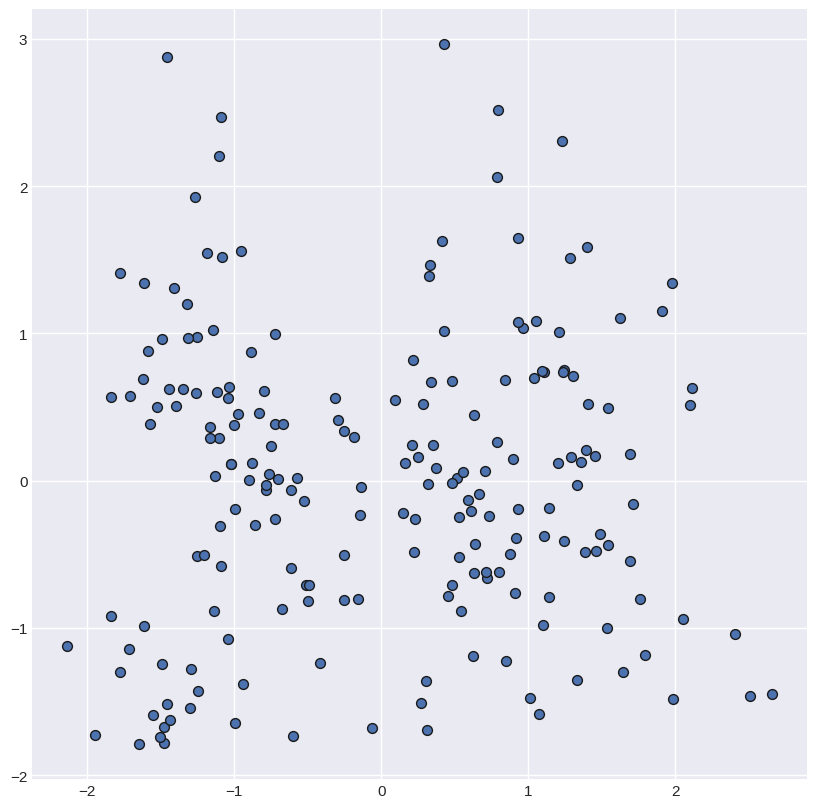

In [99]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')

X_agg = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

# Ensure data is NumPy arrays
X_msc_np = np.array(X_agg)
cluster_centers_np = np.array(cluster_centers)

# PCA Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_msc_np)

scat1 = ax.scatter(X_pca[:,0], X_pca[:,1], s=50, edgecolor='k')

Define the helper functions.

In [100]:
def get_labels(linkage, X, n_clusters, prev_labels=None):
    aggcluster = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    aggcluster.fit(X)
    labels = aggcluster.labels_
    new_labels = labels.copy()

    if prev_labels is not None:
        for i in range(10):
            ids = np.arange(len(labels))[labels == i]
            for j in range(10):
                prev_ids = np.arange(len(labels))[prev_labels == j]
                if np.array_equal(ids, prev_ids):
                    new_labels[ids] = j
                elif set(prev_ids).issubset(ids) and prev_ids.size * 2 >= ids.size:
                    new_labels[ids] = j

    return new_labels

def get_colors(labels):
    colors = [0] * labels.size
    for i in range(labels.size):
        colors[i] = cmap(labels[i]/10)
    return colors

def animate1(i, linkage):
    global labels
    prev_labels = labels
    labels = get_labels(linkage=linkage, X=X, n_clusters=10-i, prev_labels=prev_labels)
    color = get_colors(labels)
    scat1.set_color(color)

In [101]:
linkage = 'ward'
labels = None
anim = FuncAnimation(fig, animate1, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

In [102]:
linkage = 'single'
labels = None
anim = FuncAnimation(fig, animate1, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

In [103]:
linkage = 'complete'
labels = None
anim = FuncAnimation(fig, animate1, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

In [104]:
linkage = 'average'
labels = None
anim = FuncAnimation(fig, animate1, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

#### TSNE dimensionally reduced data

In [105]:
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab20')

/tmp/ipython-input-3756433481.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('tab20')


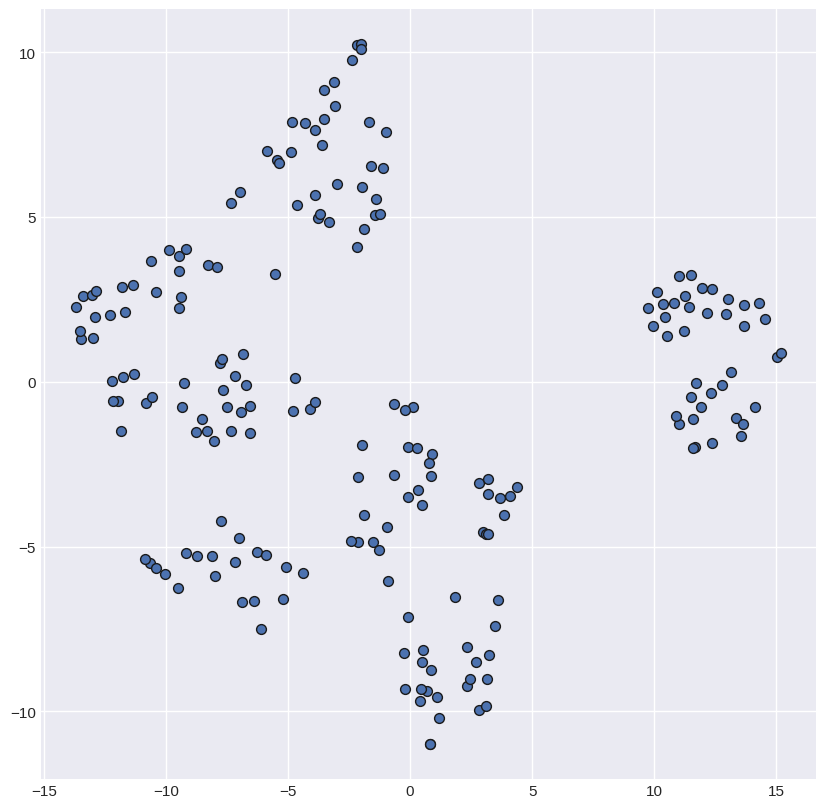

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('white')

X_agg = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

# TSNE Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_agg)

scat2 = ax.scatter(X_tsne[:,0], X_tsne[:,1], s=50, edgecolor='k')

In [107]:
def get_labels(linkage, X, n_clusters, prev_labels=None):
    aggcluster = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    aggcluster.fit(X)
    labels = aggcluster.labels_
    new_labels = labels.copy()

    if prev_labels is not None:
        for i in range(10):
            ids = np.arange(len(labels))[labels == i]
            for j in range(10):
                prev_ids = np.arange(len(labels))[prev_labels == j]
                if np.array_equal(ids, prev_ids):
                    new_labels[ids] = j
                elif set(prev_ids).issubset(ids) and prev_ids.size * 2 >= ids.size:
                    new_labels[ids] = j

    return new_labels

def get_colors(labels):
    colors = [0] * labels.size
    for i in range(labels.size):
        colors[i] = cmap(labels[i]/10)
    return colors

def animate2(i, linkage):
    global labels
    prev_labels = labels
    labels = get_labels(linkage=linkage, X=X, n_clusters=10-i, prev_labels=prev_labels)
    color = get_colors(labels)
    scat2.set_color(color)

In [108]:
linkage = 'ward'
labels = None
anim = FuncAnimation(fig, animate2, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

In [109]:
linkage = 'complete'
labels = None
anim = FuncAnimation(fig, animate2, fargs=(linkage,), interval=2000, frames=10)
HTML(anim.to_html5_video())

## Final Conclusions

Based on your analysis of the Mall Customers dataset using various clustering methods and dimensionality reduction techniques, here are some final conclusions:

### K-Means Clustering

*   **Annual Income vs Spending Score:** K-Means performed very well on this feature combination, identifying 5 distinct clusters that are easily interpretable and visually well-separated in the scatter plot. The clusters represent meaningful customer segments like "High Income, High Spending" and "Low Income, Low Spending". This is likely the most effective feature combination for K-Means on this dataset.
*   **Annual Income vs Age:** K-Means with 3 clusters on these features resulted in clusters that were less clearly separated and perhaps less intuitively interpretable compared to the Income vs Spending clusters.
*   **Age vs Spending Score:** Both the Elbow and Silhouette methods suggested 2 clusters for this combination. While these clusters ("Older, Low Spending" and "Younger, High Spending") make some logical sense, the separation was not as distinct as the Income vs Spending clusters.
*   **All Features (after t-SNE and PCA):** K-Means on the dimensionality-reduced data (both t-SNE and PCA) with all features (including the encoded 'Genre') resulted in 4 clusters. The interpretation of these clusters, while possible, was more complex than the 2-feature Income vs Spending clusters. The visualization on the 2D projections showed some separation, but the underlying structure from the original feature space might be lost or distorted.

**Overall for K-Means:** The model worked best and provided the most actionable insights when applied to the **Annual Income and Spending Score** features.

### Gaussian Mixture Model (GMM)

*   **All Features:** GMM with all features resulted in 6 clusters based on the BIC. However, the visualization on the t-SNE and PCA projections did not show clearly defined clusters, suggesting that GMM did not capture the underlying structure of the full dataset as effectively as other methods in this case.
*   **Annual Income vs Spending Score:** GMM with 5 components (based on BIC) performed comparably well to K-Means on this feature combination. The resulting clusters and their characteristics were similar to the K-Means results, and the visualizations showed good separation. This is likely the best feature combination for GMM on this dataset.
*   **Annual Income vs Age:** GMM with 2 components (based on BIC) on these features resulted in clusters that were not logically intuitive and lacked clear separation in the visualizations.
*   **Age vs Spending Score:** GMM with 3 components (based on BIC) on these features also did not produce well-defined or easily interpretable clusters.

**Overall for GMM:** Similar to K-Means, GMM performed best and provided meaningful clusters when applied to the **Annual Income and Spending Score** features.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

*   **All Features:** DBSCAN with all features (scaled) resulted in 5 clusters and a significant number of noise points. While some clusters appeared somewhat separated in the PCA and t-SNE projections, the presence of many noise points and the complex interpretation of clusters in a 4D space make this less straightforward.
*   **Annual Income vs Spending Score:** DBSCAN on these features with optimized `eps` and `min_samples` found 4 clusters and some noise. The clusters were reasonably well-defined visually, but perhaps not as clearly as the 5 clusters found by K-Means and GMM on the same features. The interpretation of the 4 clusters was also plausible.

**Overall for DBSCAN:** DBSCAN was able to find clusters, particularly on the **Annual Income and Spending Score** features. It also identified outliers as noise, which can be a useful characteristic. However, finding optimal parameters (`eps`, `min_samples`) can be challenging, and the resulting clusters on the Income vs Spending features were arguably less distinct than those from K-Means or GMM.

### Mean Shift Clustering

*   **All Features:** Mean Shift on all features resulted in a varying number of clusters depending on the bandwidth. A smaller bandwidth yielded more clusters with some visual separation in the 2D projections (PCA and t-SNE), while a larger bandwidth led to fewer, more mixed clusters. Mean Shift's performance on the full dataset was not as clearly defined as K-Means or GMM on their best feature combinations.
*   **Annual Income vs Spending Score:** Mean Shift on these features with different bandwidths produced different numbers of clusters (7 with smaller bandwidth, 5 with larger bandwidth). The clusters with the larger bandwidth (5 clusters) appeared very well-defined and comparable to those found by K-Means and GMM. This suggests Mean Shift is also effective on this feature combination.
*   **Annual Income vs Age:** Mean Shift on these features also showed different clustering results based on bandwidth. A smaller bandwidth produced more clusters with some logical sense, arguably better than K-Means or GMM on this pair. A larger bandwidth resulted in fewer clusters, still reasonably well-defined.
*   **Age vs Spending Score:** Mean Shift on these features with smaller bandwidth produced 9 clusters, which were somewhat defined but potentially too many for meaningful interpretation. A larger bandwidth resulted in 6 clusters, which were still not as clearly separated as desired.

**Overall for Mean Shift:** Mean Shift showed promising results, particularly on the **Annual Income and Spending Score** features, where it produced well-defined clusters similar to K-Means and GMM. It also seemed to provide more logically intuitive clusters than K-Means or GMM when applied to the **Annual Income and Age** features, depending on the bandwidth. The main challenge is the sensitivity to the bandwidth parameter.

### Summary of Best Feature Combinations for Each Model:

*   **K-Means:** **Annual Income vs Spending Score**
*   **GMM:** **Annual Income vs Spending Score**
*   **DBSCAN:** **Annual Income vs Spending Score**
*   **Mean Shift:** **Annual Income vs Spending Score** and potentially **Annual Income vs Age** depending on the bandwidth.

While several models performed well on the Annual Income vs Spending Score features, K-Means and GMM provided the most consistently well-defined and easily interpretable clusters for this dataset. Mean Shift also performed well on this combination and offered interesting alternative perspectives on the Income vs Age relationship depending on the bandwidth. DBSCAN was useful for identifying outliers but found fewer clear clusters on the Income vs Spending features compared to K-Means and GMM.